# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

##### Условные обозначения столбцов: 
total_images — число фотографий\
last_price — цена на момент снятия с публикации\
total_area — общая площадь квартиры в квадратных метрах (м²)\
first_day_exposition — дата публикации\
rooms — число комнат\
ceiling_height — высота потолков (м)\
floors_total — всего этажей в доме\
living_area — жилая площадь в квадратных метрах (м²)\
floor — этаж\
is_apartment — апартаменты (булев тип)\
studio — квартира-студия (булев тип)\
open_plan — свободная планировка (булев тип)\
kitchen_area — площадь кухни в квадратных метрах (м²)\
balcony — число балконов\
locality_name — название населённого пункта\
airports_nearest — расстояние до ближайшего аэропорта в метрах (м)\
cityCenters_nearest — расстояние до центра города (м)\
parks_around3000 — число парков в радиусе 3 км\
parks_nearest — расстояние до ближайшего парка (м)\
ponds_around3000 — число водоёмов в радиусе 3 км\
ponds_nearest — расстояние до ближайшего водоёма (м)\
days_exposition — сколько дней было размещено объявление (от публикации до снятия) 



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [4]:
data.tail(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,4,NaN,...,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,...,6.00,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,...,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,...,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,...,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.50,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

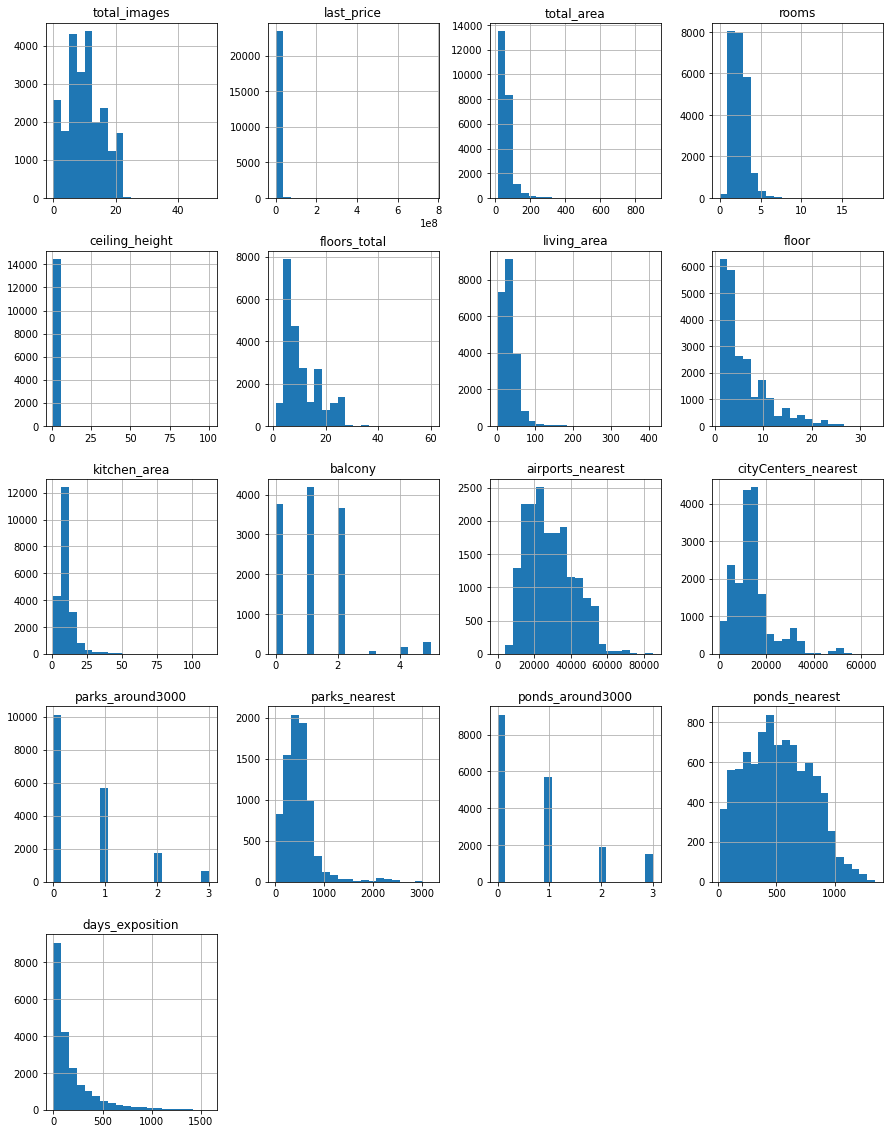

In [6]:
data.hist(figsize=(15, 20), bins=20);

In [7]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Здесь сразу можно обратить внимание на строку со стандартным отклонением. значение в некоторых столбцах довольно высокое - значит,  есть выбросы \
Еще, сразу же проверим данные на явные дубликаты 

In [8]:
data.duplicated().sum() 

0

тут все отлично 

#### выводы : 
 1 в данных есть пропуски -необходимо понять, можем ли мы их заполнить или удалить (если удалим -повлияет ли это на общий результат?)
 
 2 Есть столбцы с высоким стандартным отклонением, т.е в них есть выбросы. Необходимо понять их  природу (некоректно заполненные данные, ошибки в формировании таблицы или другое) 
 3 В некоторых столбцах тип данных некоректен (например, в first_day_exposition нужно менять тип на datetime, а в is_apartment на bool), необходимо привести данные в этих таблицу к нужному типу 
 

### Предобработка данных

Вывожу количество пропусков в каждом столбце на экран 

In [9]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [10]:
data = data.rename(columns = {'cityCenters_nearest': 'city_centers_nearest'}) # привожу название столбца в один регистр
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [11]:
data.isna().sum().sort_values()/ data.shape[0]*100 #считаю количество пропусков в процентом соотношении

total_images             0.000000
open_plan                0.000000
floor                    0.000000
rooms                    0.000000
studio                   0.000000
total_area               0.000000
last_price               0.000000
first_day_exposition     0.000000
locality_name            0.206760
floors_total             0.362885
living_area              8.029875
kitchen_area             9.612220
days_exposition         13.422507
ponds_around3000        23.283683
parks_around3000        23.283683
city_centers_nearest    23.287902
airports_nearest        23.384953
ceiling_height          38.799105
balcony                 48.605426
ponds_nearest           61.559559
parks_nearest           65.909954
is_apartment            88.290645
dtype: float64

Сразу видим, в каких столбцах мы  точно можем  прставить пропущенные значения:  floors_total, is_apartment, balcony. Так как наличие пропусков указывает на непринадлежность квартиры к этим критериям (то есть она не является апартаментом и/или у нее нет балкона). А пропуске в ст. floors_total скорее всего, подразумевают то, что дом, в котором находится квартира-одноэтажный.

Так же, мы вывели процентное соотношение пропусков к общему числу значений. Исходя из этого, можно сделать выводы, что, не считая столбцов выше, самые больше пропуски в тех данных, где указывается инфраструктура поблизости. Вернемся к этому позже 

In [14]:
 data['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [15]:
data['floors_total'] = data['floors_total'].fillna(1)
data['floors_total'].isna().sum() # проверяю себя, что все пустые значения ушли


0

Проверим, есть ли квартиры, где этаж указан выше общего кол-ва этажей в доме. Если таких обьявлений мало, то их смело можно удалять. Но если их кол-во больше 1% от общего числа, то это важный сигнал, на который стоит обратить внимание 

In [16]:
(data['floors_total'][data['floors_total'] < data['floor']].sum())/ data['floors_total'].count() * 100

0.35022574792185324

Удаляем эти обьявления  

In [17]:
data = data.drop(data[data['floors_total'] < data['floor']].index)

Проверяем себя. Изначально в столбце было 23 699 значений. Значит, если все корректно, должно уйти не меньше 100

In [18]:
data['floor'].count() 

23616

Теперь заменяем отсуствующие значяение в is_apartment на булев массив 

In [19]:
data['is_apartment'] = data['is_apartment'].fillna(False) 
data['is_apartment'].isna().sum() 


0

In [20]:
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [21]:
data['balcony'] = data['balcony'].fillna(0)
data['is_apartment'].isna().sum()

0

В days_exposition мы заменяем пропуски на пустые значения, так как 0 может испорить наши данные. Меиану не подставляем, так как пропуски могут сигназилировать о какой-то проблеме 

In [22]:
data['days_exposition'] = data['days_exposition'].fillna(0) 
data['is_apartment'].isna().sum()

0

In [23]:
data.isna().sum().sort_values()/ data.shape[0]*100 #еще раз вывожу таблицу для удобства, отсортировав по количеству пропусков


total_images             0.000000
balcony                  0.000000
open_plan                0.000000
is_apartment             0.000000
floor                    0.000000
floors_total             0.000000
studio                   0.000000
rooms                    0.000000
first_day_exposition     0.000000
total_area               0.000000
last_price               0.000000
days_exposition          0.000000
locality_name            0.203252
living_area              7.926829
kitchen_area             9.459688
parks_around3000        23.323171
ponds_around3000        23.323171
city_centers_nearest    23.327405
airports_nearest        23.424797
ceiling_height          38.622121
ponds_nearest           61.627710
parks_nearest           65.934112
dtype: float64

Далее - посмотрим уникальные значения locality_name. Скорее всего, там могут быть неочевидные дубликаты 

In [24]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Пишем функцию, котррая будет заменять нам неочевидные дубликаты,  и поочереди их находить. Начнем с Е и Ё:

In [25]:
def locality_rename (old, new):
    data['locality_name'] = data['locality_name'].str.replace(old, new)
    return data['locality_name'].sort_values().unique()

In [26]:
locality_rename ('поселок','посёлок')

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской посёлок Большая Ижора', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Лесогорский',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Рощино', 'городской посёлок Свирьстрой',
       'городской посёлок Советский', 'городской посёлок Фёд

Функция работает, и теперь можно сделать то же самое с другими неочевидными дубликатами 

In [27]:
locality_rename ("городской посёлок",'посёлок городского типа' )
locality_rename("посёлок при железнодорожной станции", "посёлок станции")

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

In [28]:
# check
data.locality_name.nunique()

321

Те населенные пункты, которые отличаются доп. припиской мы объединять не будем (пример - 'деревня Кудрово', 'Кудрово'). Так как это могут быть названия разных населенных пунктов и их обьединение  исказит данные для анализа

Отлично, теперь удалим пропуски - их процент очень маленький от общего числа (0,2%), так что можно не волноваться, что другие значения в этих строках повлияют на дальнейший  анализ 

In [29]:
data =  data.dropna(subset=['locality_name'])
data['locality_name'].isna().sum()

0

еще раз выводим инфо и уже обратим внимание на типы данных

In [30]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23568 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23568 non-null  int64  
 1   last_price            23568 non-null  float64
 2   total_area            23568 non-null  float64
 3   first_day_exposition  23568 non-null  object 
 4   rooms                 23568 non-null  int64  
 5   ceiling_height        14481 non-null  float64
 6   floors_total          23568 non-null  float64
 7   living_area           21701 non-null  float64
 8   floor                 23568 non-null  int64  
 9   is_apartment          23568 non-null  bool   
 10  studio                23568 non-null  bool   
 11  open_plan             23568 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23568 non-null  float64
 14  locality_name         23568 non-null  object 
 15  airports_nearest   

Пишем функцию, которая поможет быстро менять типы данных в столбцах  на нужные 

In [31]:
def types(series, types): # функция принимает на вход название столбца и тип данных, в который ее нужно преобразовать 
    data[series] = data[series].astype(types)
    return data[series].dtypes # возвращаем тип данных для проверки себя 

Меняем тип данных в необходимых столбцах:

In [32]:
types('balcony','Int64')
types('parks_around3000','Int64')
types('ponds_around3000','Int64')
types('days_exposition','int')
types('floors_total','Int64')

Int64Dtype()

Теперь приведем first_day_exposition в формат даты 

In [33]:
data['first_day_exposition']= pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')


In [34]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,0
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.60,1,False,...,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.30,4,False,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558
3,0,64900000.0,159.00,2015-07-24,3,NaN,14,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121
5,10,2890000.0,30.40,2018-09-10,1,NaN,12,14.40,5,False,...,9.10,0,посёлок городского типа Янино-1,NaN,NaN,<NA>,NaN,<NA>,NaN,55
6,6,3700000.0,37.30,2017-11-02,1,NaN,26,10.60,6,False,...,14.40,1,посёлок Парголово,52996.0,19143.0,0,NaN,0,NaN,155
7,5,7915000.0,71.60,2019-04-18,2,NaN,24,NaN,22,False,...,18.90,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,0
8,20,2900000.0,33.16,2018-05-23,1,NaN,27,15.43,26,False,...,8.81,0,посёлок Мурино,NaN,NaN,<NA>,NaN,<NA>,NaN,189
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,6.50,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289


Переходим к потолкам. При выводе уникальных значений в глаза бросаются аномально высокие потолки.
Так как данные заполнялись вручную, то, скорее всего, такие значения - ошибка, обусловленная человеческим фактором. Пусть потолки, чья высота более 10 метров -будут считатся ошибкой заполнения. Сразу же исправим ее

In [35]:
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

In [36]:
for item in data['ceiling_height']:
    if item >= 10.0:
        data['ceiling_height'] = data['ceiling_height'].replace(item, item / 10)

data['ceiling_height'].unique()

array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.47,  2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,
        2.59,  2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,
        3.55,  3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,
        5.  ,  2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,
        4.7 ,  2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,
        2.3 ,  3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,
        3.95,  3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,
        3.24,  4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,
        3.09,  8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,
        2.68,  3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,
        3.32,  1.2 ,

In [37]:
data['ceiling_height'].isna().sum() # узнаем кол-во нулевых значений 

9087

9к - очень большая цифра, чтобы удалять эти значения. Заполним их медианой, чтобы сохранить эти сроки,  не изказив при этом данные.\
Но для  начала, зафиксируем основные параметры столбца (ст. отклонение, медиану и тд), чтобы, при дальнейшей обработке видеть как меняются (или не меняются) метрики

In [38]:
data['ceiling_height'].describe()

count    14481.000000
mean         2.727815
std          0.299744
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         10.000000
Name: ceiling_height, dtype: float64

In [39]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['ceiling_height'].describe()

count    23568.000000
mean         2.697812
std          0.237987
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

Далее построим гистограмму размаха, чтобы  увидеть другие аномальные значения 

<AxesSubplot:>

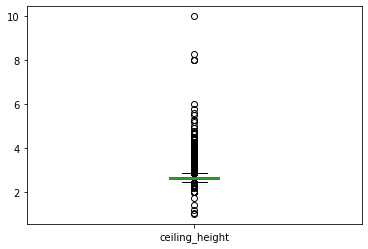

In [40]:
data['ceiling_height'].plot.box()

#plt.ylim(1,10)

Сразу видим, что минимальное значение - примерно 2.3 м, значит, все что ниже уже нас не интересует. А если мы вернемся к гистограмме, которую мы делали для обзора всех данных, то увидим, что значения выше 6м и ниже 2м в целом не вошли в обзор. Применим фильтр, который отсечет эти значения

In [41]:
data =  data.loc[(data['ceiling_height']  > 2)  &  (data['ceiling_height'] < 6)]
data['ceiling_height'].unique()

array([2.7 , 2.65, 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 ,
       2.55, 3.  , 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57, 4.15,
       3.5 , 3.3 , 2.71, 4.  , 2.47, 2.73, 2.84, 3.1 , 2.34, 3.4 , 3.06,
       2.72, 2.54, 2.51, 2.78, 2.76, 2.58, 3.7 , 2.52, 5.2 , 2.87, 2.66,
       2.59, 2.45, 3.6 , 2.92, 3.11, 3.13, 3.8 , 3.15, 3.55, 3.16, 3.62,
       3.12, 2.53, 2.74, 2.96, 2.46, 5.3 , 5.  , 2.79, 2.95, 4.06, 2.94,
       3.82, 3.54, 3.53, 2.83, 4.7 , 2.4 , 3.38, 3.01, 5.6 , 3.65, 3.9 ,
       3.18, 3.35, 2.3 , 3.57, 2.48, 2.62, 2.82, 3.98, 2.63, 3.83, 3.52,
       3.95, 3.75, 2.88, 3.67, 3.87, 3.66, 3.85, 3.86, 4.19, 3.24, 4.8 ,
       4.5 , 4.2 , 3.36, 3.08, 3.68, 3.07, 3.37, 3.09, 3.26, 3.34, 2.81,
       3.44, 2.97, 3.14, 4.37, 2.68, 3.22, 3.27, 4.1 , 2.93, 3.46, 3.47,
       3.33, 3.63, 3.32, 2.98, 2.86, 3.17, 4.4 , 3.28, 3.04, 4.45, 5.5 ,
       3.84, 3.23, 3.02, 3.21, 3.43, 3.78, 4.3 , 3.39, 2.69, 3.31, 4.65,
       3.56, 2.2 , 3.51, 3.93, 3.42, 2.99, 3.49, 4.

Создадим новый столб last_price_million, где округлим сумму до миллионов, для удобства в дальшейшем анализе

In [42]:
data['last_price_million'] = data['last_price'] / 1000000
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_price_million
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,0,13.000
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81,3.350
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,5.196
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,64.900
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,10.000


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23545 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23545 non-null  int64         
 1   last_price            23545 non-null  float64       
 2   total_area            23545 non-null  float64       
 3   first_day_exposition  23545 non-null  datetime64[ns]
 4   rooms                 23545 non-null  int64         
 5   ceiling_height        23545 non-null  float64       
 6   floors_total          23545 non-null  Int64         
 7   living_area           21680 non-null  float64       
 8   floor                 23545 non-null  int64         
 9   is_apartment          23545 non-null  bool          
 10  studio                23545 non-null  bool          
 11  open_plan             23545 non-null  bool          
 12  kitchen_area          21324 non-null  float64       
 13  balcony         

проверим какие аномалии остались:

In [52]:
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price_million', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max','median'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price_million,living_area,kitchen_area,floor,floors_total
count,"23,545.00","23,545.00","23,545.00","23,545.00","23,545.00","21,680.00","21,324.00","23,545.00","23,545.00"
min,0.00,12.00,2.20,0.00,0.01,2.00,1.30,1.00,1.00
max,19.00,900.00,5.80,"1,580.00",763.00,409.70,112.00,33.00,60.00
median,2.00,52.00,2.65,73.00,4.65,30.00,9.10,4.00,9.00


У нас остались пропуски в living_area и kitchen_area. Их мы трогать не будем, так как медиальное значение может оказаться больше общей жилплощади, а ноль сдвинет медиану и другие метрики

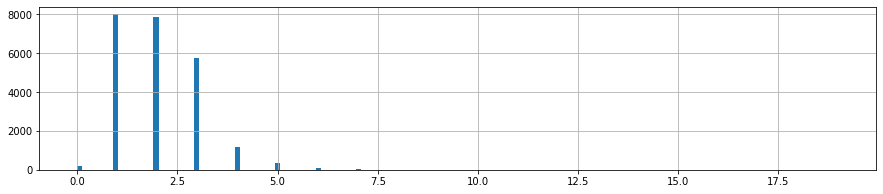

In [53]:
# rooms
data.rooms.hist(bins = 150, figsize = (15,3));

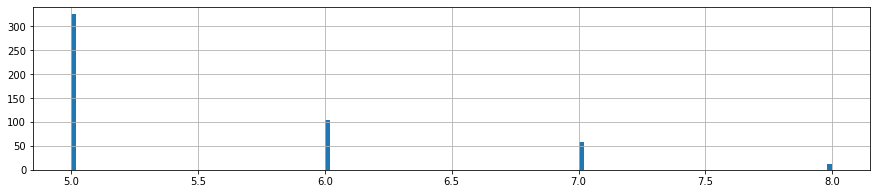

In [54]:
# rooms
data.rooms.hist(bins = 150, figsize = (15,3), range = (5,8));

В rooms при первичном анализе не было отражено наличие пропусков, однако, в данных есть квартиры с 0 комнат. Посчитаем их кол-во

In [55]:
# rooms
data['rooms'][data['rooms'] == 0].count()

194

На основе гистограмм и анализа кол-ва значений, можем сделать вывод, что квартиры меньше 1 и больше 7 комнат можно считать редкими.  Cоздаем столб с отфильтрованными данными 

In [56]:
# rooms
data['rooms_normal'] = data['rooms'][(data['rooms'] != 0) & (data['rooms'] <= 7)]

In [57]:
#проверяем, сколько ушло в %
n = ((data['rooms'].count() - data['rooms_normal'].count()) / data['rooms'].count())  
f'Oбьем данных в столбце rooms стал меньше на {n:.2%} процентов'

'Oбьем данных в столбце rooms стал меньше на 0.96% процентов'

Для total_area выше уже были сделаны вычисления, так что просто создаем по аналогии столб с отфильтрованными данными:

In [58]:
data['total_area_normal'] = data['total_area'][(data['total_area'] >= 20) & (data['total_area'] <= 250)]

In [59]:
#проверка
n = ((data['total_area'].count() - data['total_area_normal'].count()) / data['total_area'].count())  
f'Oбьем данных в столбце total_area стал меньше на {n:.2%} процентов'

'Oбьем данных в столбце total_area стал меньше на 0.59% процентов'

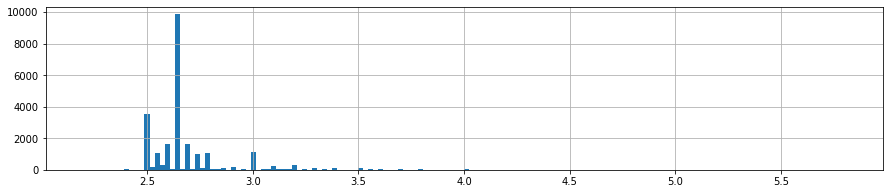

In [60]:
# ceiling_height
data.ceiling_height.hist(bins = 150, figsize = (15,3));

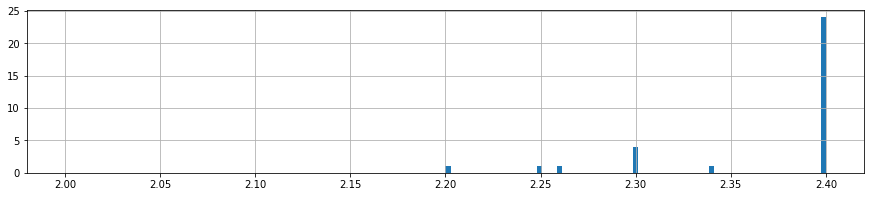

In [61]:
# ceiling_height
data.ceiling_height.hist(bins = 150, figsize = (15,3), range =(2, 2.4));

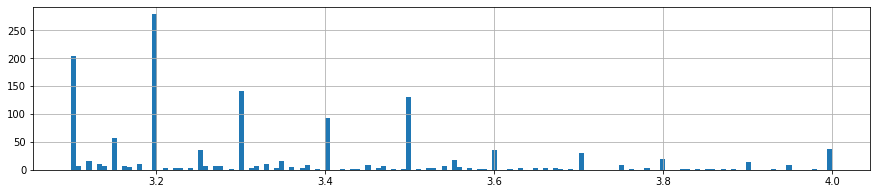

In [62]:
# ceiling_height
data.ceiling_height.hist(bins = 150, figsize = (15,3), range =(3.1, 4));

Нормой будем считать квартиры с потолками  от 2.4 до 3.6 метров 

In [63]:
# ceiling_height
data['ceiling_height_normal'] = data['ceiling_height'][(data['ceiling_height'] >= 2.4) & (data['ceiling_height'] <= 3.6)]

In [64]:
#проверка
n = ((data['ceiling_height'].count() - data['ceiling_height_normal'].count()) / data['ceiling_height'].count())  
f'Oбьем данных в столбце ceiling_height стал меньше на {n:.2%} процентов'

'Oбьем данных в столбце ceiling_height стал меньше на 0.86% процентов'

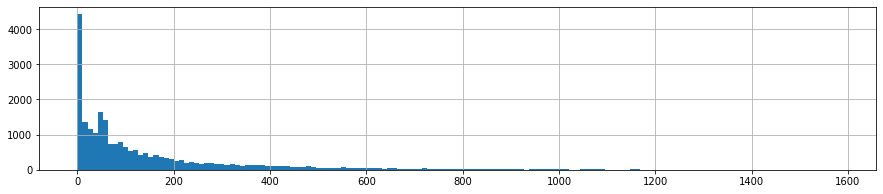

In [65]:
# days_exposition
data.days_exposition.hist(bins = 150, figsize = (15,3));

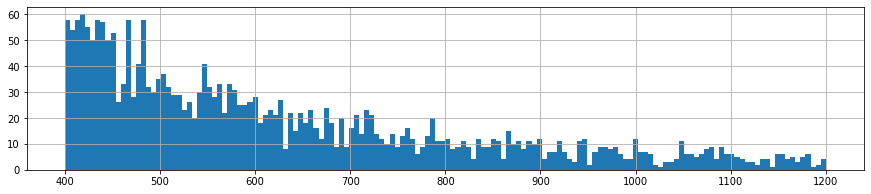

In [66]:
# days_exposition
data.days_exposition.hist(bins = 150, figsize = (15,3), range =(400, 1200));

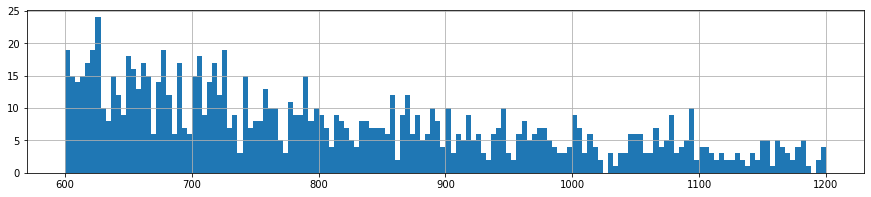

In [67]:
# days_exposition
data.days_exposition.hist(bins = 150, figsize = (15,3), range =(600, 1200));

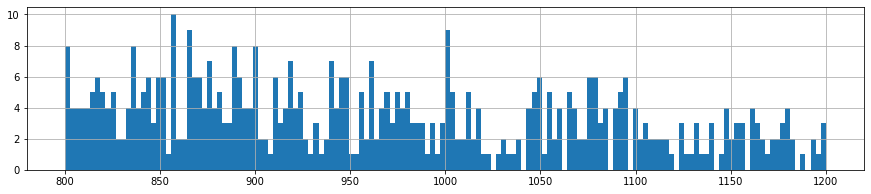

In [68]:
# days_exposition
data.days_exposition.hist(bins = 150, figsize = (15,3), range =(800, 1200));

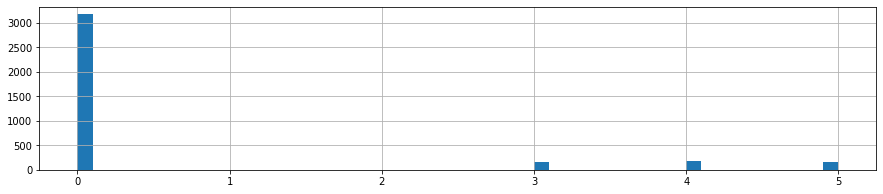

In [69]:
# days_exposition
data.days_exposition.hist(bins = 50, figsize = (15,3), range =(0, 5));

 Будем считать, что продажи больше 1100 дней, а так же в 1 и 2 дня - редкость  

In [70]:
# days_exposition
data['days_exposition_normal'] = data['days_exposition'][(data['days_exposition'] < 1 ) | (data['days_exposition'] >= 3 )]
data['days_exposition_normal'] = data['days_exposition_normal'][(data['days_exposition_normal'] <= 1110)]

                                                        

In [71]:
#проверка
n = ((data['days_exposition'].count() - data['days_exposition_normal'].count()) / data['days_exposition'].count())  
f'Oбьем данных в столбце days_exposition стал меньше на {n:.2%} процентов'

'Oбьем данных в столбце days_exposition стал меньше на 0.66% процентов'

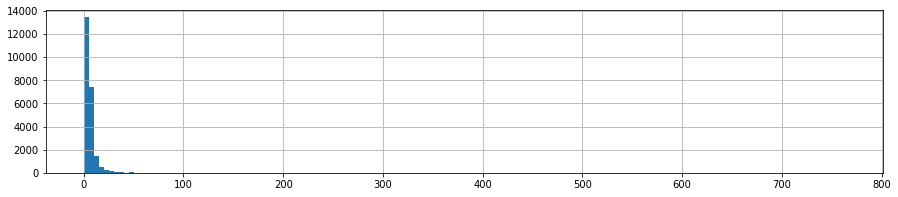

In [72]:
# last_price_million
data.last_price_million.hist(bins = 150, figsize = (15,3));

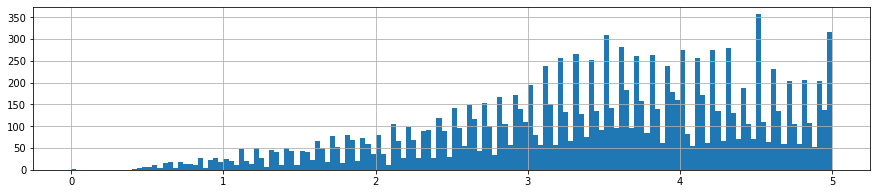

In [73]:
# last_price_million
data.last_price_million.hist(bins = 150, figsize = (15,3), range =(0, 5));

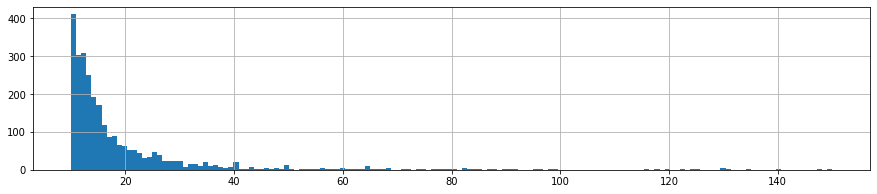

In [74]:
# last_price_million
data.last_price_million.hist(bins = 150, figsize = (15,3), range =(10, 150));

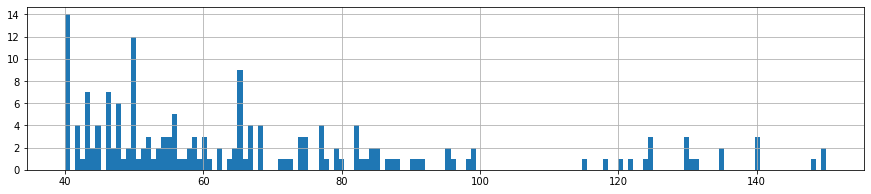

In [75]:
# last_price_million
data.last_price_million.hist(bins = 150, figsize = (15,3), range =(40, 150));

Норма: стоимость квартиры от  миллиона до 100 
* Можно увидеть "яму" между 100 и 115 миллионами - в этой границе, возможно, начинается определенный класс элитной недвижимости 

In [76]:
# last_price_million
data['last_price_million_normal'] =(data['last_price_million']
                                    [(data['last_price_million'] >= 1)
                                    & (data['last_price_million'] <= 100)]
                                   )

In [77]:
#проверка
n = ((data['last_price_million'].count() - data['last_price_million_normal'].count()) / data['last_price_million'].count())  
f'Oбьем данных в столбце last_price_million стал меньше на {n:.2%} процентов'

'Oбьем данных в столбце last_price_million стал меньше на 1.11% процентов'

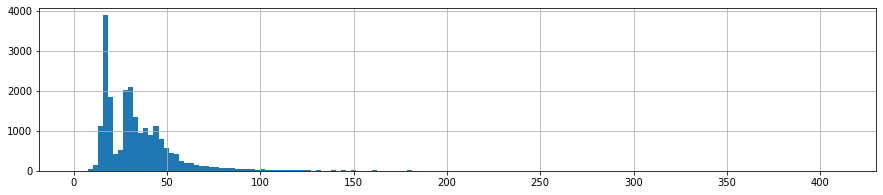

In [78]:
# living_area 
data.living_area.hist(bins = 150, figsize = (15,3));

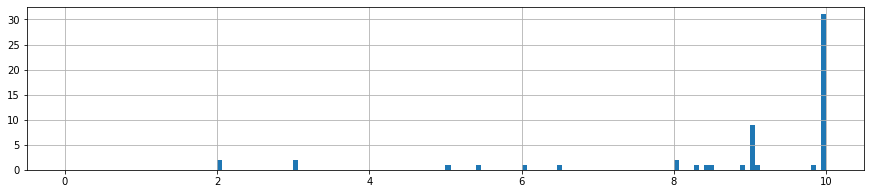

In [79]:
# living_area 
data.living_area.hist(bins = 150, figsize = (15,3), range =(0, 10));

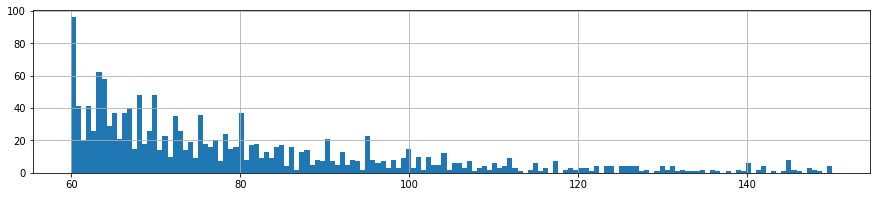

In [80]:
# living_area 
data.living_area.hist(bins = 150, figsize = (15,3), range =(60, 150));

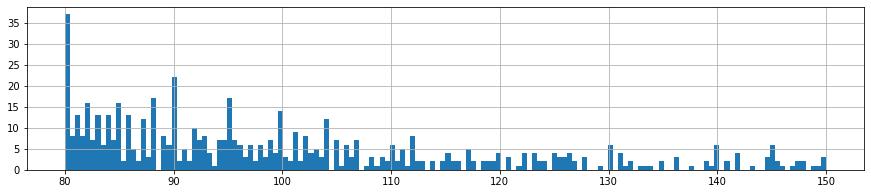

In [81]:
# living_area 
data.living_area.hist(bins = 150, figsize = (15,3), range =(80, 150));

Пороговые значения: до 13 кв.м  и выше 80 кв.м.

In [82]:
# living_area
data['living_area_normal'] =(data['living_area'][(data['living_area'] >= 9) & (data['living_area'] <= 120)])                                

In [83]:
#проверка
n = ((data['living_area'].count() - data['living_area_normal'].count()) / data['living_area'].count())  
f'Oбьем данных в столбце living_area стал меньше на {n:.2%} процентов'

'Oбьем данных в столбце living_area стал меньше на 1.06% процентов'

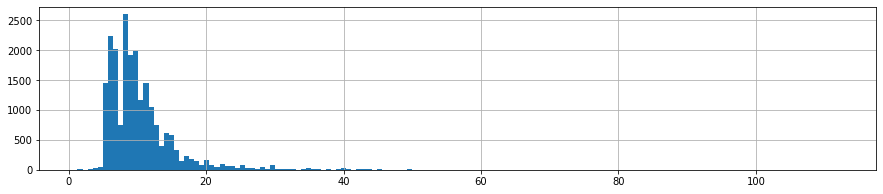

In [84]:
# kitchen_area
data.kitchen_area.hist(bins = 150, figsize = (15,3));

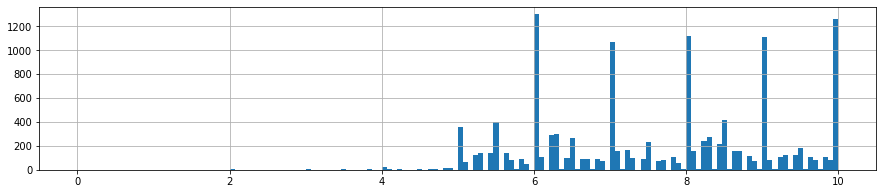

In [85]:
# kitchen_area
data.kitchen_area.hist(bins = 150, figsize = (15,3), range =(0, 10));

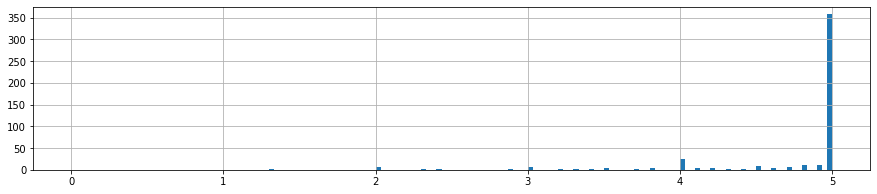

In [86]:
# kitchen_area
data.kitchen_area.hist(bins = 150, figsize = (15,3), range =(0, 5));

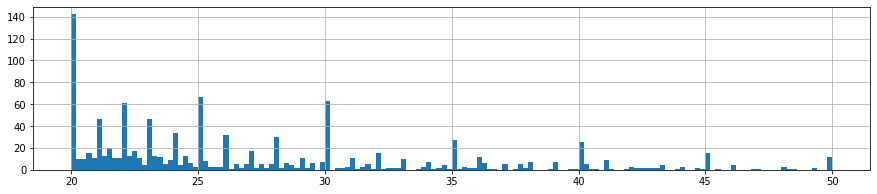

In [87]:
# kitchen_area
data.kitchen_area.hist(bins = 150, figsize = (15,3), range =(20, 50));

Квартиры, чья площадь кухни меньше 4 и больше 40 кв.м можно считать достаточно редкими 

In [88]:
# kitchen_area
data['kitchen_area_normal'] =(data['kitchen_area'][(data['kitchen_area'] >= 4) & (data['kitchen_area'] <= 40)])

In [89]:
#проверка
n = ((data['kitchen_area'].count() - data['kitchen_area_normal'].count()) / data['kitchen_area'].count())  
f'Oбьем данных в столбце kitchen_area стал меньше на {n:.2%} процентов'

'Oбьем данных в столбце kitchen_area стал меньше на 0.74% процентов'

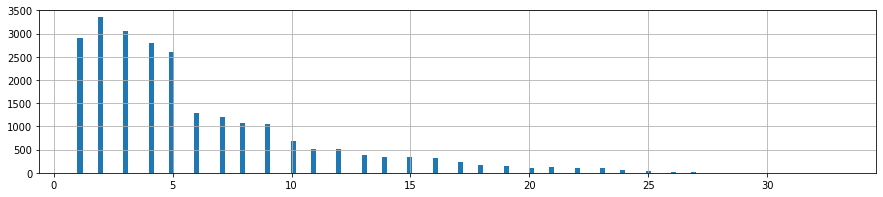

In [90]:
# floor
data.floor.hist(bins = 150, figsize = (15,3));

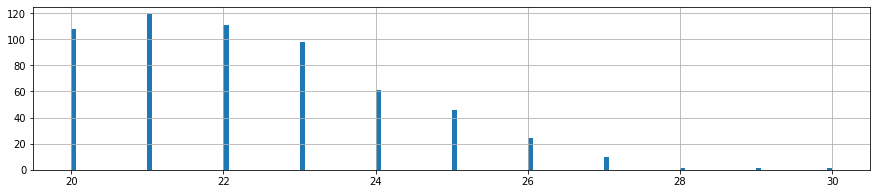

In [91]:
# floor
data.floor.hist(bins = 150, figsize = (15,3), range =(20, 30));

Возьмем за пороговое  23 этаж (то есть, все что выше - редкие значения):

In [92]:
# floor
data['floor_normal'] =(data['floor'][data['floor'] <= 23])

In [93]:
#проверка
n = ((data['floor'].count() - data['floor_normal'].count()) / data['floor'].count())  
f'Oбьем данных в столбце floor стал меньше на {n:.2%} процентов'

'Oбьем данных в столбце floor стал меньше на 0.62% процентов'

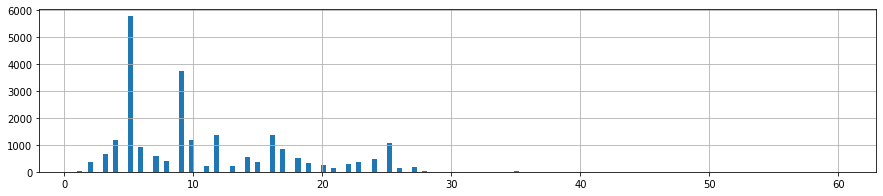

In [94]:
# floors_total 
data.floors_total.hist(bins = 150, figsize = (15,3));

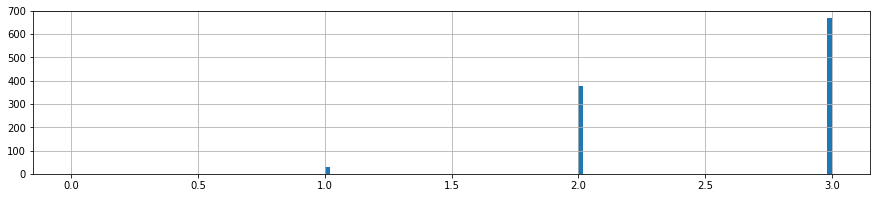

In [95]:
# floors_total 
data.floors_total.hist(bins = 150, figsize = (15,3), range = (0, 3));

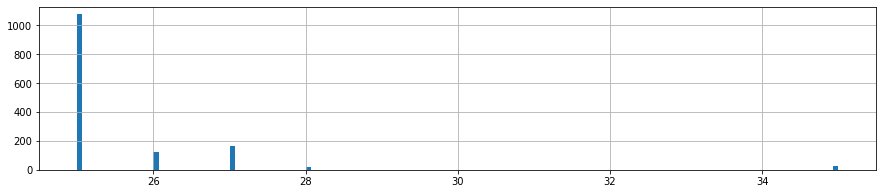

In [96]:
# floors_total 
data.floors_total.hist(bins = 150, figsize = (15,3), range = (25, 35));

Здесь же норма чуть сдвигается по сравнению с floor и редкими значениями можно считать дома от 26 этажей, а так же одноэтажные постройки 

In [97]:
# floors_total
data['floors_total_normal'] =(data['floors_total'][(data['floors_total'] >= 1) & (data['floors_total'] <= 26)])

In [98]:
#проверка
n = ((data['floors_total'].count() - data['floors_total_normal'].count()) / data['floors_total'].count())  
f'Oбьем данных в столбце floors_total стал меньше на {n:.2%} процентов'

'Oбьем данных в столбце floors_total стал меньше на 0.92% процентов'

Теперь, когда мы устранили все редкие значения, проверим как изменилась метрика по этим столбцам\
Для начала, еще раз выведем изначальные данные, добавив к ним стандартное отклонение:

In [99]:
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price_million', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max','median', 'std'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price_million,living_area,kitchen_area,floor,floors_total
count,"23,545.00","23,545.00","23,545.00","23,545.00","23,545.00","21,680.00","21,324.00","23,545.00","23,545.00"
min,0.00,12.00,2.20,0.00,0.01,2.00,1.30,1.00,1.00
max,19.00,900.00,5.80,"1,580.00",763.00,409.70,112.00,33.00,60.00
median,2.00,52.00,2.65,73.00,4.65,30.00,9.10,4.00,9.00
std,1.08,35.66,0.22,213.56,10.89,22.04,5.90,4.87,6.59


Теперь: отсортированные данные:

In [100]:
(
    data[['rooms_normal', 'total_area_normal', 'ceiling_height_normal', 'days_exposition_normal', 
          'last_price_million_normal', 'living_area_normal',  'kitchen_area_normal',
          'floor_normal', 'floors_total_normal']]
    .apply (['count', 'min', 'max','median', 'std'])   
    .style.format("{:,.2f}")
)

,rooms_normal,total_area_normal,ceiling_height_normal,days_exposition_normal,last_price_million_normal,living_area_normal,kitchen_area_normal,floor_normal,floors_total_normal
count,"23,320.00","23,407.00","23,342.00","23,389.00","23,284.00","21,451.00","21,166.00","23,398.00","23,328.00"
min,1.00,20.00,2.40,0.00,1.00,9.00,4.00,1.00,1.00
max,7.00,250.00,3.60,"1,110.00",99.00,120.00,40.00,23.00,26.00
median,2.00,52.00,2.65,72.00,4.65,30.00,9.07,4.00,9.00
std,1.02,28.87,0.18,194.60,6.44,16.88,4.80,4.64,6.39


После обработки в столбцах days_exposition_normal и kitchen_area незначительно упала медиана. В остальных же данных она осталось прежней.\
Во всех столбцах стандартное откложение стало ниже.

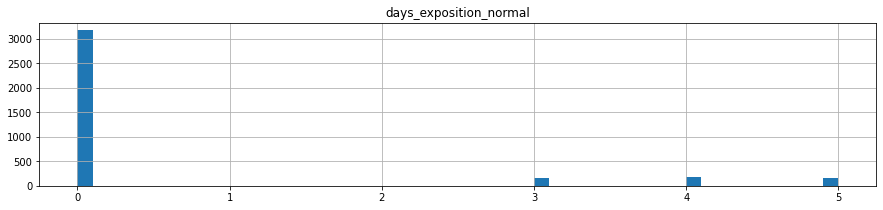

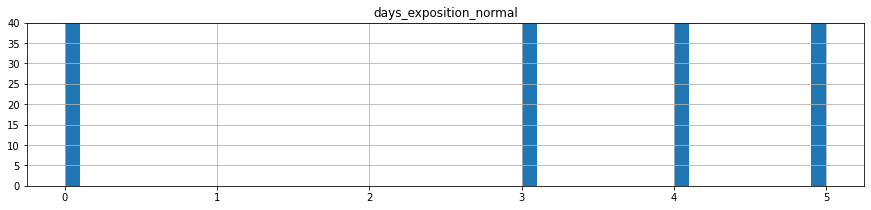

In [101]:
# check
data.hist(column = 'days_exposition_normal', bins = 50, figsize = (15,3), range = (0,5));

data.hist(column = 'days_exposition_normal', bins = 50, figsize = (15,3), range = (0,5))
plt.ylim(0, 40);

#### выводы :
1 Заменили пустые значения (на ноль) там, где пропуски подразумевали это \
2 Сделали проверку на дубликаты и удалили неявные  в столбце "locality_name" \
3 Изменили тип данных в ряде столбцов \
4 first_day_exposition сделали в формате datetime \
5 Проанализировали аномальные значения в 'ceiling_height'. Исправили ошибочные значения, и заполнили пропуски медианой.
Применили фильтрацию, при которой отсекли нереалистичные значения ( потолки меньше 2х  и больше 6 метров 


### Посчитайте и добавьте в таблицу новые столбцы

#### Столбцы, которые нужно добавить:
- цена одного квадратного метра; 
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее); 
- месяц публикации объявления; 
- год публикации объявления; 
- тип этажа квартиры (значения — «‎первый», «последний», «другой»); 
- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).



Начнем с расчета цены одного квадратного метра. Для этого необходимо поделить "last_price" на "total_area". Сохраним значение в переменной "price_one_area"

In [102]:
data['price_one_area'] = (data['last_price_million'] / data['total_area'])
data['price_one_area'] = data['price_one_area'].round(2) # округляем значения до сотен
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,rooms_normal,total_area_normal,ceiling_height_normal,days_exposition_normal,last_price_million_normal,living_area_normal,kitchen_area_normal,floor_normal,floors_total_normal,price_one_area
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,3.0,108.0,2.70,0.0,13.000,51.0,25.0,8.0,16,0.12
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,1.0,40.4,2.65,81.0,3.350,18.6,11.0,1.0,11,0.08
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,2.0,56.0,2.65,558.0,5.196,34.3,8.3,4.0,5,0.09
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,3.0,159.0,2.65,424.0,64.900,NaN,NaN,9.0,14,0.41
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,2.0,100.0,3.03,121.0,10.000,32.0,NaN,13.0,14,0.10


Создадим 3 столбца в которых будет указана информация о днях недели, месяцах, и годах, когда были опубликованы обьявления 

In [103]:
data['day_of_the_week_exposition'] = data['first_day_exposition'].dt.weekday # создаем столб с днем недели
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month # с номером месяца
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year # и с годом публикации обьявления 
data.info() # проверяем себя, что все работет корректно 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23545 entries, 0 to 23698
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   total_images                23545 non-null  int64         
 1   last_price                  23545 non-null  float64       
 2   total_area                  23545 non-null  float64       
 3   first_day_exposition        23545 non-null  datetime64[ns]
 4   rooms                       23545 non-null  int64         
 5   ceiling_height              23545 non-null  float64       
 6   floors_total                23545 non-null  Int64         
 7   living_area                 21680 non-null  float64       
 8   floor                       23545 non-null  int64         
 9   is_apartment                23545 non-null  bool          
 10  studio                      23545 non-null  bool          
 11  open_plan                   23545 non-null  bool      

Сортировку этажей по признаку сделаем через переименование значений по условию в loc :

In [103]:
def sort_floors(data, floor, floors_total):
    data['floors_sorted'] = data[floor]
    data.loc[data['floors_sorted'] <= 0 , 'floors_sorted'] = 'странные данные'
    data.loc[(data['floors_sorted'] != data[floors_total]) & (data['floors_sorted']!= 1), 'floors_sorted'] = 'другой'
    data.loc[data['floors_sorted']== 1, 'floors_sorted'] ='первый'
    data.loc[data['floors_sorted'] == data[floors_total], 'floors_sorted'] = 'последний'

 

In [104]:
sort_floors(data, 'floor', 'floors_total')

In [105]:
data['floors_sorted'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

последнее: нужно создать столб, где будет посчитано расстояние до центра города в км. Здесь мы просто дублируем значения из city_centers_nearest и приводим в км

In [106]:
data['city_centers_nearest_km'] = (data['city_centers_nearest'] / 1000).round(0) #округляем до целого числа
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,living_area_normal,kitchen_area_normal,floor_normal,floors_total_normal,price_one_area,day_of_the_week_exposition,month_exposition,year_exposition,floors_sorted,city_centers_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,51.0,25.0,8.0,16,0.12,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,18.6,11.0,1.0,11,0.08,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,34.3,8.3,4.0,5,0.09,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,NaN,NaN,9.0,14,0.41,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,32.0,NaN,13.0,14,0.10,1,6,2018,другой,8.0


#### Выводы:
- расчитали цену одного кв метра квартиры (price_one_area)
- "разбили" дату публикации обьявления отдельно на день недели, месяц и год (day_of_the_week_exposition, month_exposition и year_exposition соответственно)
- отфильтровали этажи на "первый", "последний" и "другой" в столбце floors_sorted 
- посчитали расстояние каждой квартиры до центра города в километрах и округлили значения до целого числа в city_centers_nearest_km

### Проведите исследовательский анализ данных

#### Задачи: 
##### Изучите следующие параметры объектов:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.
Постройте отдельные гистограммы для каждого из этих параметров. Опишите все ваши наблюдения по параметрам в ячейке с типом markdown.

##### Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление. 
 
- Постройте гистограмму.
- Посчитайте среднее и медиану.
В ячейке типа markdown опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?

##### Какие факторы больше всего влияют на общую (полную) стоимость объекта?
 Изучите, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).
Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.

##### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

##### Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

Изучим более детально отдельные параметры квартир. Начнем с общей площади:

<AxesSubplot:>

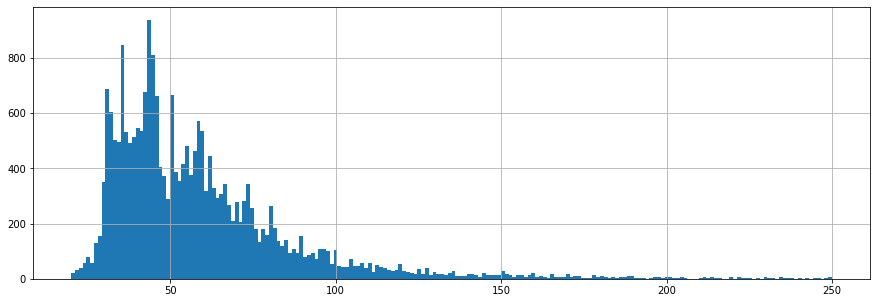

In [107]:
data['total_area_normal'].hist( bins=200, figsize =(15, 5)) # выводим гистграмму 

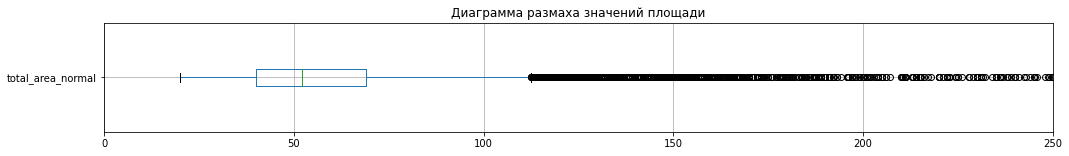

In [108]:
# check
# для примера горизонтальный вид диаграммы размаха

fig, ax = plt.subplots(figsize = (17,2))
ax = data[['total_area_normal']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений площади')
ax.set_xlim(0, 250);

In [109]:
data['total_area_normal'].describe()

count    23407.000000
mean        59.015085
std         28.866508
min         20.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        250.000000
Name: total_area_normal, dtype: float64

По распределению гистограммы видно, что график вырисовывет нормальное распредление со сдвигом влево. Это косвенный признак того, что в данных проблем нет и  с ними можно работать 
Большая часть квартир имеет площадь в промежутке от 40 до 69 кв.м, однако на графиках видно больое количество выбросов и значений, переходящих за 100кв.м и выше - эти частые выбросы можно обьяснить двумя факторами:
 - В Санкт-Петербурге и Ленинградсткой области очень распространены коммунальные квартиры, которые имеют большое количество комнат, и, в следствии, большую площадь.
 - Так как эта область является второй по популярности после Москвы и МО, то, логично предположить, что такая площадь может так же принадлежать квартирам элитного класса

жилая площадь:

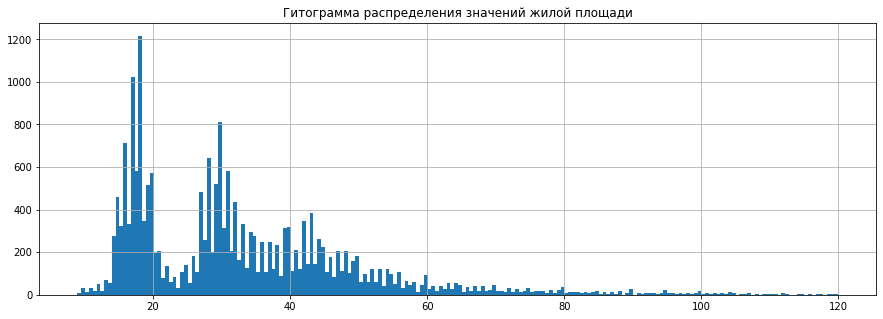

In [110]:
data['living_area_normal'].hist( bins=200, figsize =(15, 5)) 
plt.title('Гитограмма распределения значений жилой площади');

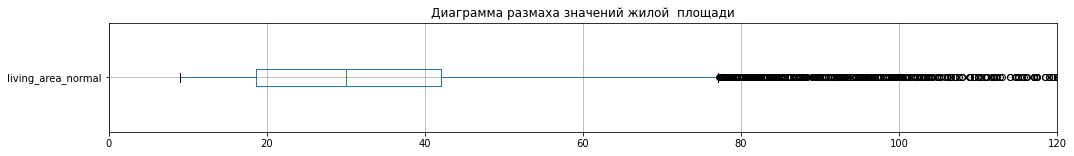

In [111]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['living_area_normal']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений жилой  площади')
ax.set_xlim(0, 120);

In [112]:
data['living_area_normal'].describe() 

count    21451.000000
mean        33.133430
std         16.876977
min          9.000000
25%         18.600000
50%         30.000000
75%         42.000000
max        120.000000
Name: living_area_normal, dtype: float64

Здесь можно уже увидеть связь с предыдущим графиком: значения квартилей и медианы примерно в половину раз меньше чем эти же значения чем в графике выше. Вполне логично, однако, смущает то, что гистограмма  не распределена нормально и имеет выброс с дальнейшим резким спадом. Составим еще один график, где по оси х будет общая площадь, а по у - жилая :

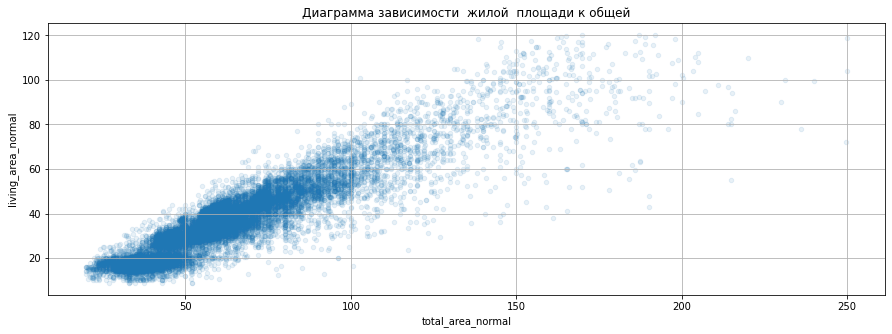

In [113]:
data.plot(
    x = 'total_area_normal',
    y = 'living_area_normal',
    kind = 'scatter',
    title = 'Диаграмма зависимости  жилой  площади к общей',
    alpha = 0.1 ,
    grid = True, 
    figsize = (15, 5));

По диагремме видно, что чем выше площадь квартиры, тем больше ее жил. площадь (что логично). Но у квартир с малым метражом нижняя граница какое-то время держится в приближенном к нулю значении. Возможно, у таких квартир общая площадь увеличивается за счет кухни, сан. узла и тд

площадь кухни:

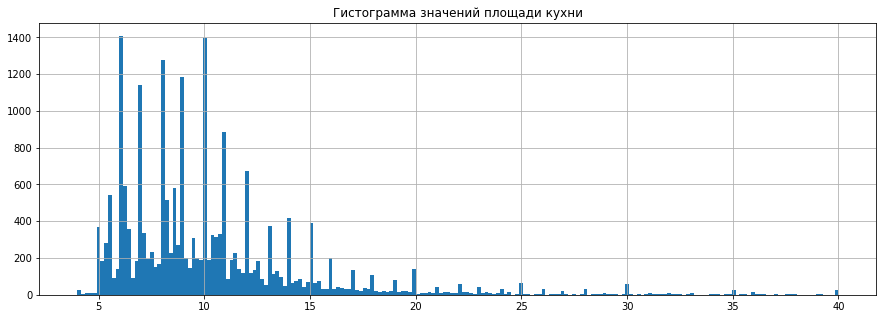

In [114]:
data['kitchen_area_normal'].hist( bins=200, figsize =(15, 5)) 
plt.title('Гистограмма знaчений площади кухни');


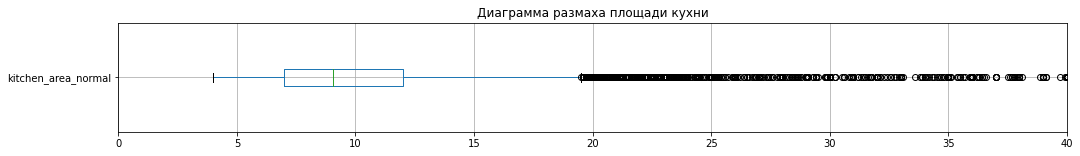

In [115]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['kitchen_area_normal']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха площади кухни')
ax.set_xlim(0, 40);

In [116]:
data['kitchen_area_normal'].describe() 

count    21166.000000
mean        10.316483
std          4.801257
min          4.000000
25%          7.000000
50%          9.070000
75%         12.000000
max         40.000000
Name: kitchen_area_normal, dtype: float64

Видим высокий рост популярности квартир с кухнями от 4 до 12 метров. Квартир с более низкой площадью ощутимо меньше, но, исходя из диаграммы размаха, они не считаются редкими.\
Скорее всего низкая, но, при этом популярность, вызвана более доступной ценой для таких квартир. Чуть ниже мы будем проверять наличие связи между количеством квадратных метров и цены, там же и рассмотрим эту гипотезу.

цена объекта:

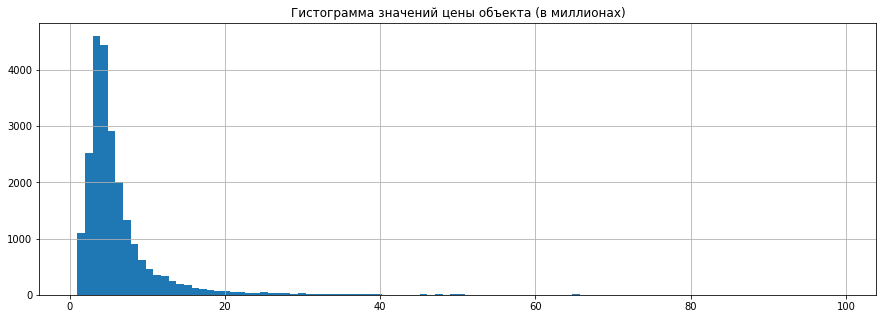

In [117]:
data['last_price_million_normal'].hist( bins=100, figsize =(15, 5)) 
plt.title('Гистограмма значений цены объекта (в миллионах)');

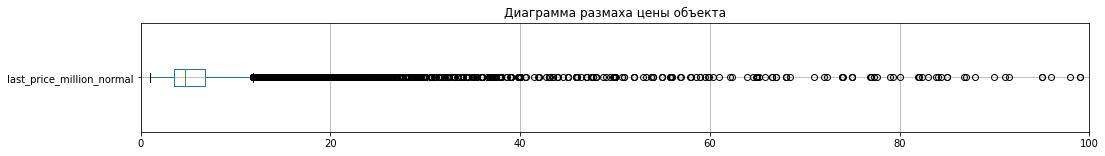

In [118]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['last_price_million_normal']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха цены объекта')
ax.set_xlim(0, 100);

In [119]:
data['last_price_million_normal'].describe()

count    23284.000000
mean         6.302527
std          6.440631
min          1.000000
25%          3.460000
50%          4.650000
75%          6.800000
max         99.000000
Name: last_price_million_normal, dtype: float64

Средняя цена объектов - до 10 миллионов. Но мы не можем говорить, что эти данные одинаковы для кажого населенного пункта. Ниже мы будем более подробно рассматривать 10 самых популярных городов и как их данные отличаются от общих 

количество комнат:

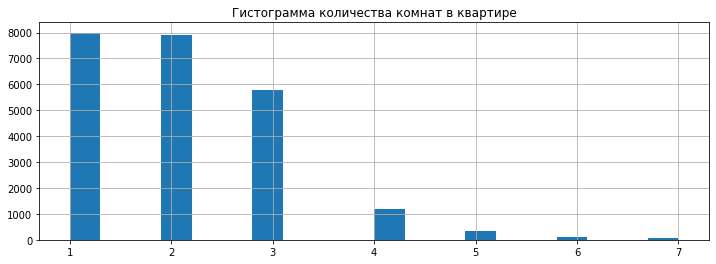

In [120]:
data['rooms_normal'].hist( bins=20, figsize =(12, 4)) 
plt.title('Гистограмма количества комнат в квартире');


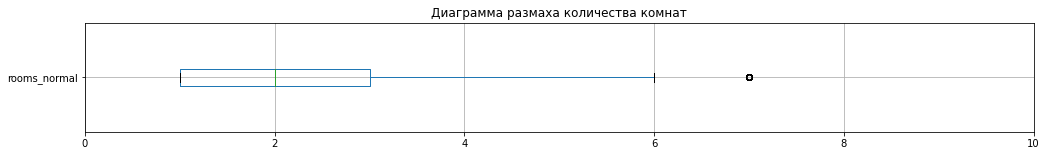

In [121]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['rooms_normal']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха количества комнат')
ax.set_xlim(0, 10);

In [122]:
data['rooms_normal'].describe()

count    23320.000000
mean         2.077530
std          1.022451
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms_normal, dtype: float64

Самое популярное кол-во комнат от 1 до 3х 

высота потолков:

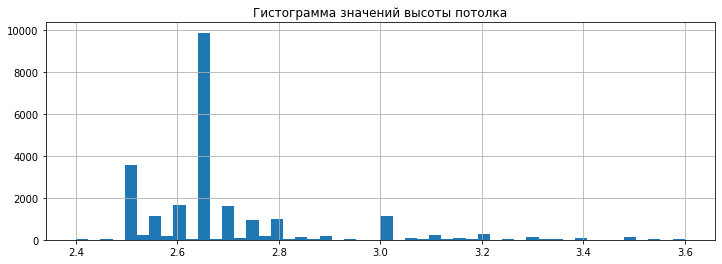

In [123]:
data['ceiling_height_normal'].hist( bins=50, figsize =(12, 4)) 
plt.title('Гистограмма значений высоты потолка');

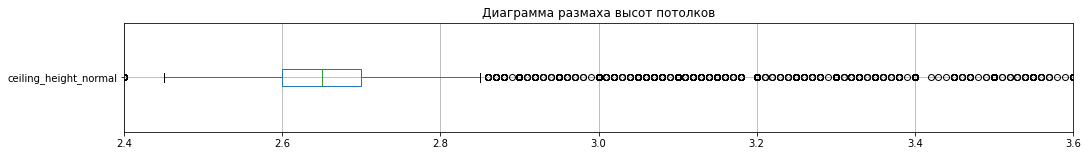

In [124]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['ceiling_height_normal']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха высот потолков')
ax.set_xlim(2.4, 3.6);

In [125]:
data['ceiling_height_normal'].describe()

count    23342.000000
mean         2.686451
std          0.183029
min          2.400000
25%          2.600000
50%          2.650000
75%          2.700000
max          3.600000
Name: ceiling_height_normal, dtype: float64

В целом, мы разбирали здачения из данного столбца еще во время предобработки, но дополнительно сейчас можно отметить, что самая частая высота потолков - в диапазоне от 2.5 до 2.7 метров 

этаж квартиры:

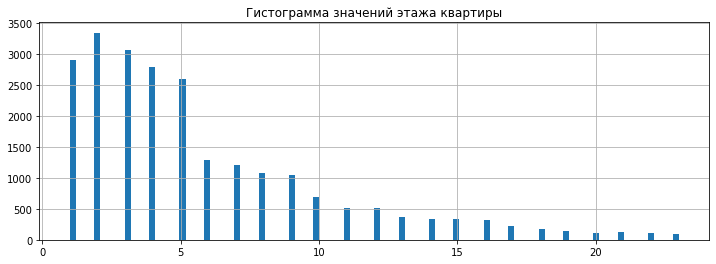

In [126]:
data['floor_normal'].hist( bins=100, figsize =(12, 4)) 
plt.title('Гистограмма значений этажа квартиры');

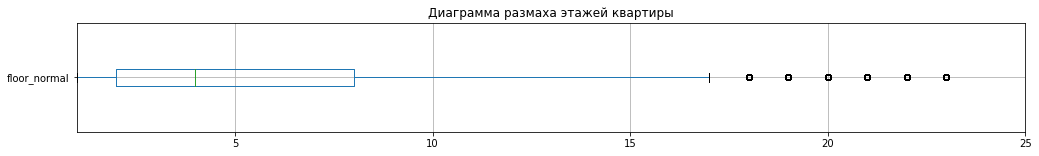

In [127]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['floor_normal']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха этажей квартиры')
ax.set_xlim(1, 25);

In [128]:
data['floor_normal'].describe()

count    23398.000000
mean         5.756475
std          4.640416
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         23.000000
Name: floor_normal, dtype: float64

Здесь  можно заметить, что большая часть обьявлений - это продажа квартир на низких этажах(до 10). Возможно, это просто из-за того, что в поселках и деревнях  нет высоток. Посмотрим это на графике общего количество этажах в доме. Тут же посмотрим отношение продаж квартир на первом этаже, последнем и других:

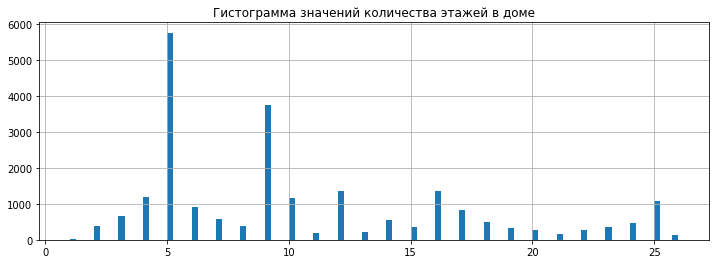

In [129]:
data['floors_total_normal'].hist(bins=100, figsize =(12, 4))
plt.title('Гистограмма значений количества этажей в доме');

Отмечаются пики в 5, 9, 10, 12, 16 и 25 этажах. Самые высокие из них - 5 и 9.\
Это доказывает предположение о низких этажах, что написано выше

<AxesSubplot:>

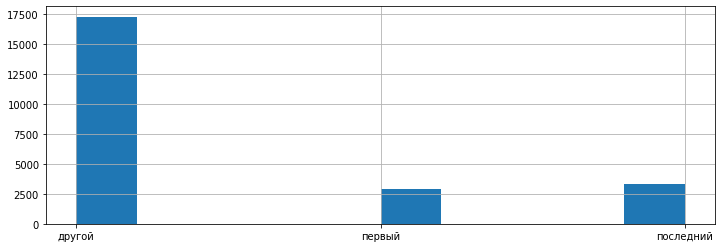

In [130]:
data['floors_sorted'].hist(figsize =(12, 4))

Тут тоже все вполне ожидаемо, ведь "другой" охватывает много значений, и по совокупности они во много раз превышают "первый" и "последний"

Теперь рассмотрим гистограммы расстояний до обьектов инфраструктуры:

<AxesSubplot:>

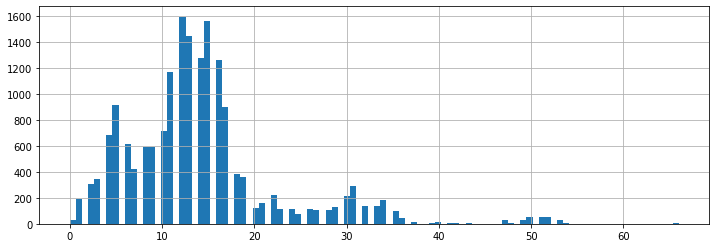

In [131]:
data['city_centers_nearest_km'].hist(bins=100, figsize =(12, 4))

Большая часть обьявлений находится в радиусе до 20км от центра города. Это связано с тем, что данные содержать обьявления как внутри города, так и по области 
    

Расстояние до ближайшего аэропорта(в метрах):

<AxesSubplot:>

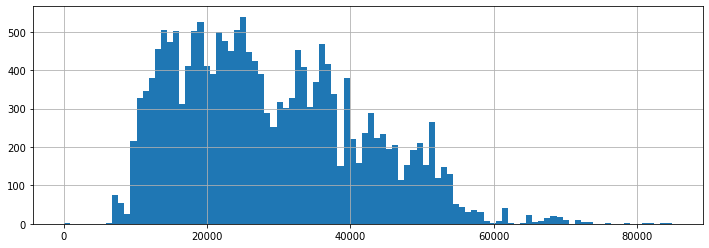

In [132]:
data['airports_nearest'].hist(bins=100, figsize =(12, 4)) 

Тут уже среднее, по сравнению с предыдущим графиком, уходит больше вправо - вполне логично, учитывая, что в области, помимо Питера, есть и другие города, а  аэропорт один (напомню, что мы не приводили расстояния в метры нигде, кроме в расстоянии до центра, поэтому и значения на графиках совершенно разные)

Расстояние до ближайшего парка:

<AxesSubplot:>

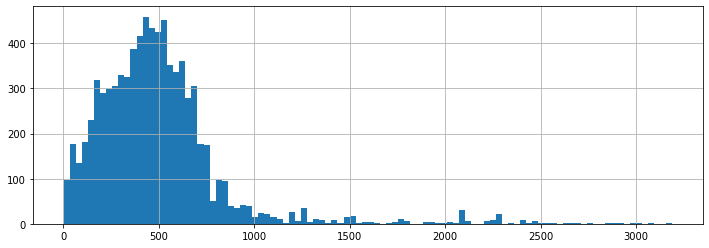

In [133]:
data['parks_nearest'].hist(bins=100, figsize =(12, 4))

Подавляющее большинство квартир имеет в радиусе до одного км хотя бы один парк 

день и месяц публикаций обьявлений:

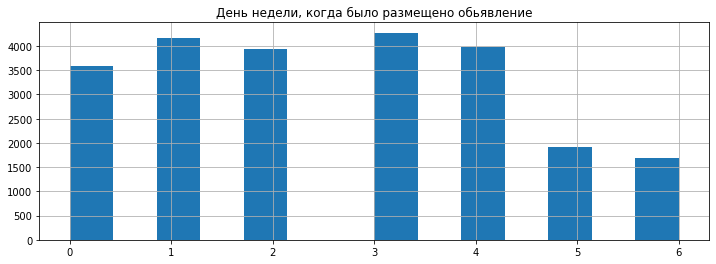

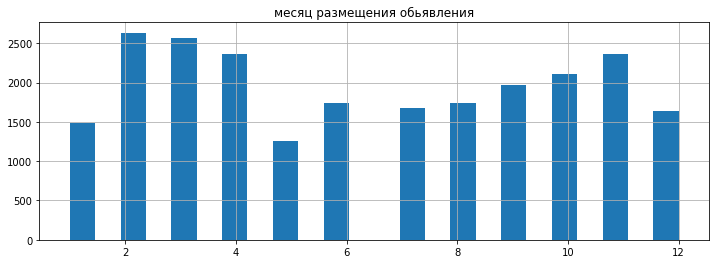

In [134]:
data['day_of_the_week_exposition'].hist(bins=14, figsize =(12, 4))
plt.title('День недели, когда было размещено обьявление')
plt.show()
data['month_exposition'].hist(bins=24, figsize =(12, 4))
plt.title('месяц размещения обьявления')
plt.show()

Обьявления чаще всего размещаются в будние дни с примерно одинаковой частотой (чуть больше остальных публикуется в четверг)

В гистограмме по  месяцам  можно заметить сезонный рост публикаций весной (с февраля по апрель) и осенью (с сентября по ноябрь) При этом, весной скачок более резкий, чем осенью. 
Эти скачки можно связать с тем, что зимой переезд более неудобен в плане организации в связи с погодными условиями + в это время снижается покупательская способность в связи с праздниками и длительными выходными. Летом же наступает пора отпусков. Поэтому, самым оптимальным вариантом для продажи жилья остановится межсезонье 


Итак, сделаем краткую выжимку из всех гистограмм, что рассмотрели выше:
  - большая часть квартир имеет площадь до 100кв.м
  - из них, жилых квадратных метров примерно в два раза меньше 
  - средняя площадь кухни от 7 до 12 метров, однако, есть квартиры-студии, где кухня либо не указана, либо посчитана очень маленьким квадратом 
  - средняя цена квартиры по Ленинградской области  около 10м.р
  - подовляющее кол-во квартир имеет 1-3 комнаты, а высота потолков не выше 3х метров 
  - часто, в расстоянии до 1 км в квартирах есть хотя бы один парк 
  - продажи квартир имеют сезонный характер в весенние и осенние периоды 

In [135]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'last_price_million',
       'rooms_normal', 'total_area_normal', 'ceiling_height_normal',
       'days_exposition_normal', 'last_price_million_normal',
       'living_area_normal', 'kitchen_area_normal', 'floor_normal',
       'floors_total_normal', 'price_one_area', 'day_of_the_week_exposition',
       'month_exposition', 'year_exposition', 'floors_sorted',
       'city_centers_nearest_km'],
      dtype='object')

Теперь изучим как быстро продавались квартиры. Узнаем какие продажи можно считать долгими и быстрыми через медиану и среднее:

<AxesSubplot:>

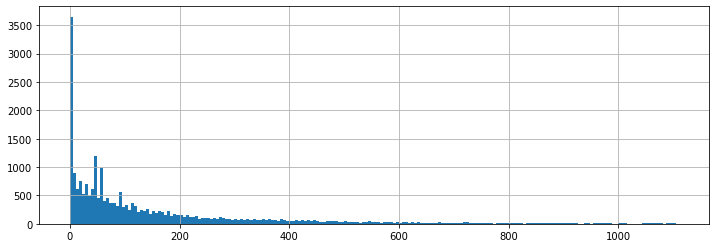

In [137]:
data['days_exposition_normal'].hist(bins = 200, figsize =(12, 4))

На гистограме видим огромный всплеск в нулевом значении - ранее мы приравняли к нему те обьявления, где в столбце не были заполнены данные. Предположим, что продать  день в день квартиру, хоть и реально, но очень маловероятно, и создадим новую переменную, где уберем ноль:

<AxesSubplot:>

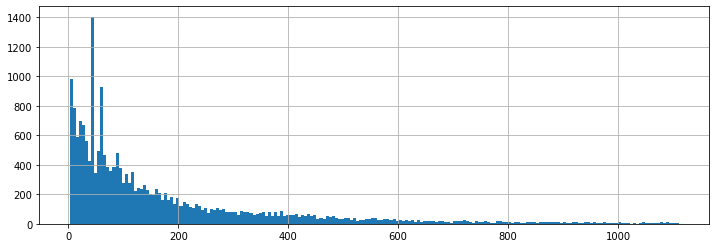

In [138]:
data['days_exposition_not_hull'] = data['days_exposition_normal'][data['days_exposition_normal'] != 0]
data['days_exposition_not_hull'].hist(bins = 200, figsize =(12, 4))

На гистограмме отчетливо видны 3 выброса, нужно внимательно их осмотреть и понять причину:

<AxesSubplot:>

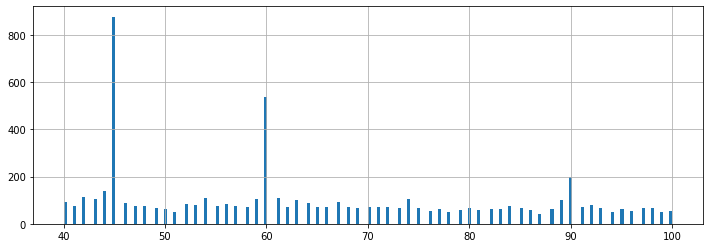

In [139]:
data['days_exposition_not_hull'].hist(bins = 200, figsize =(12, 4), range = (40, 100))

Выбросы наблюдаются значениях 30, 45, 60 и 90 дней. Обратимся к условиям размещения квартир в Яндекс.Недвижимость - пользователи могут бесплатно опубликовать объявление в срок на 45, 60 и 90 дней.\

Теперь расчитаем медиану и среднее:

In [140]:
print(data['days_exposition_not_hull'].median())
data['days_exposition_not_hull'].mean()

94.0


172.6989417466126

Среднее в два раза больше чем медиана. Попробуем составить график зависимости скорости продаж по годам. Возможно, были года со сверхбыстыми продажами или наоборот. Посчитаем среднее и медиану по каждому году и сравним их между собой: 


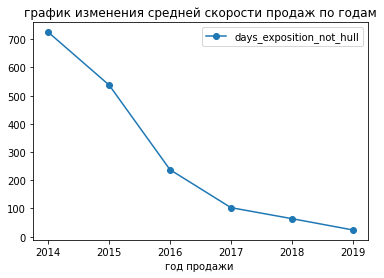

In [141]:
table =(data.pivot_table(
    index = 'year_exposition',
    values = 'days_exposition_not_hull',
    aggfunc ='median')
    .plot(style = 'o-',)
       )
plt.xlabel('год продажи ')
plt.title('график изменения средней скорости продаж по годам');


На графике видно, что скорость продаж резко уменьшилась от 2014 к 2019 году. Значит, говорить о быстрых и долгих продажах мы можем, только с оговорокой. Это не текущее среднее, быстрое и долгое время продажи, а усредненное за промежуток в 5 лет

count    20222.000000
mean       172.698942
std        199.401254
min          3.000000
25%         44.000000
50%         94.000000
75%        226.000000
max       1110.000000
Name: days_exposition_not_hull, dtype: float64

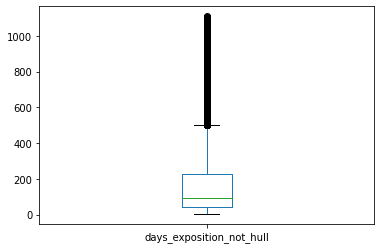

In [142]:
data['days_exposition_not_hull'].plot.box()
data['days_exposition_not_hull'].describe()

Таким образом, можно сказать что  время продажи больше 250 дней считается выше обычной, а обьявления, которые висят  500 дней и больше - долгими. Тут же можно отметить, что продажа считается достаточно быстрой, если случилась менее, чем за 45 дней

Изучим вопрос "Какие факторы больше всего влияют на общую (полную) стоимость объекта?" по параметрам:
  - общей площади;
  - жилой площади;
  - площади кухни;
  - количество комнат;
  - типа этажа, на котором расположена квартира (первый, последний, другой);
  - даты размещения (день недели, месяц, год);
  
Для этого, создадим для каждой потенциальной взаимосвязи диаграмму, значения которой отметим полу-прозрачными точками, а так же посчитаем корреляцию между значениями. Диаграмма поможет нам визуально увидеть(или не увидеть) взаимосвязь, а подсчет корреляции сравнить эту взаимосвязь с другими и ответить на поставленный вопрос 

'Зависимость между показателями составляет 74.30%'

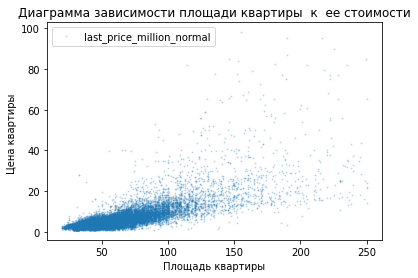

In [144]:
data.plot(x = 'total_area_normal',
          y = 'last_price_million_normal',
          style = 'o',
          alpha=0.2,          
          markersize = 1 
         );

plt.xlabel('Площадь квартиры')
plt.ylabel('Цена квартиры ')
plt.title('Диаграмма зависимости площади квартиры  к  ее стоимости');


n =  data['last_price_million_normal'].corr(data['total_area_normal'])
f'Зависимость между показателями составляет {n:.2%}'

Увеличим график до самой густой области 

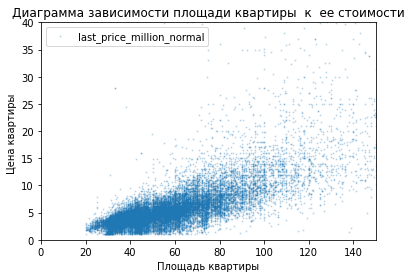

In [145]:
data.plot(x = 'total_area_normal',
          y = 'last_price_million_normal',
          style = 'o',
          alpha=0.2,          
          markersize = 1,
         );
plt.xlim([0, 150])
plt.ylim([0, 40])
plt.xlabel('Площадь квартиры')
plt.ylabel('Цена квартиры ')
plt.title('Диаграмма зависимости площади квартиры  к  ее стоимости');


Мы можем наблюдать  зависимость цены  от общей площади. Но, примерно после  80 кв.м эта зависимость  становится ощутимо меньше
Чуть раньше мы считали корзеляцию. Напомню, что она составила 74%, поэтому, мы можем говорить, что эти два показа

Количество квадратных метров действительно  сильно влияют на стоимость квартиры. При этом, можно заметить, что после 100 кв.м кореляция существенно снижается и появаляется все больше выбросов - возможно, в таких квартирах есть еще один важный фактор, влияющий на стоимость 

'Зависимость между показателями составляет 61.81%'

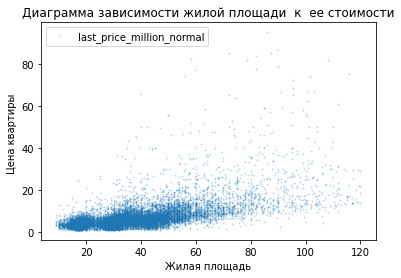

In [146]:
data.plot(x = 'living_area_normal',
          y = 'last_price_million_normal',
          style = 'o',
          alpha=0.2,          
          markersize = 1,
         );
plt.xlabel('Жилая площадь')
plt.ylabel('Цена квартиры ')
plt.title('Диаграмма зависимости жилой площади  к  ее стоимости');

n =  data['last_price_million_normal'].corr(data['living_area_normal'])
f'Зависимость между показателями составляет {n:.2%}'

Аналогично предыдущему графику, приблизим значения в самой плотной области:

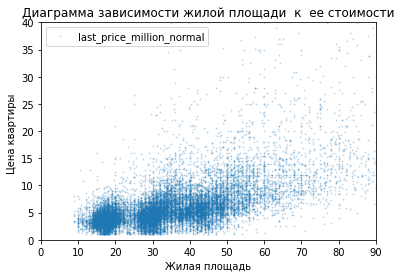

In [147]:
data.plot(x = 'living_area_normal',
          y = 'last_price_million_normal',
          style = 'o',
          alpha=0.2,          
          markersize = 1,
         );
plt.xlim([0, 90])
plt.ylim([0, 40])
plt.xlabel('Жилая площадь')
plt.ylabel('Цена квартиры ')
plt.title('Диаграмма зависимости жилой площади  к  ее стоимости');


Корреляция ниже, чем от общей площади (62%). Снижение зависимости можно обьяснить большим количеством выбросов, которые отчетливо видны на графике. Однако, 62% это все равно достаточно много, поэтому, делаем вывод, что зависимость между жилой площадью и ценой есть 

'Зависимость между показателями составляет 54.40%'

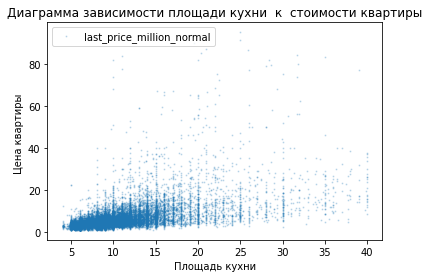

In [148]:
data.plot(x = 'kitchen_area_normal',
          y = 'last_price_million_normal',
          style = 'o',
          alpha=0.2,          
          markersize = 1,
         );
plt.xlabel('Площадь кухни')
plt.ylabel('Цена квартиры ')
plt.title('Диаграмма зависимости площади кухни  к  стоимости квартиры');

n =  data['last_price_million_normal'].corr(data['kitchen_area_normal'])
f'Зависимость между показателями составляет {n:.2%}'

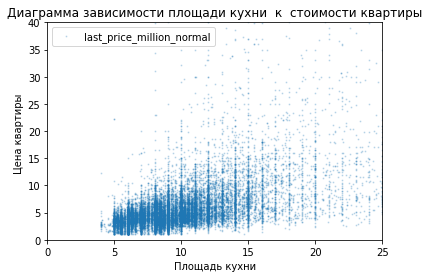

In [149]:
data.plot(x = 'kitchen_area_normal',
          y = 'last_price_million_normal',
          style = 'o',
          alpha=0.2,          
          markersize = 1,
         );
plt.xlim([0, 25])
plt.ylim([0, 40])
plt.xlabel('Площадь кухни')
plt.ylabel('Цена квартиры ')
plt.title('Диаграмма зависимости площади кухни  к  стоимости квартиры');

Данный график схож с предыдущими и это можно объяснить : площадь квартиры складывается в частности из жилой площади и кухни (есть еще полезная, но мы не учитываем ее в анализе). Поэтому, если корреляция общей площади к стоимости равна 74%, то частные этой площади будут иметь схожий процент зависимости 

Графики ниже будем строить через группировку по значениям и нахождения в них медианы. Эти медианы мы  будем визуализировать и сравнивать между собой

'Зависимость между показателями составляет 46.27%'

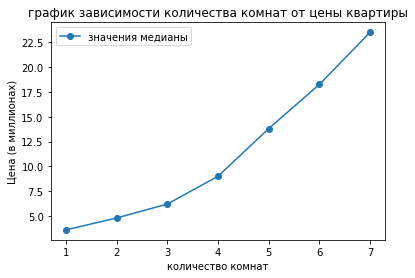

In [150]:
table = (data.pivot_table(index = 'rooms_normal',
                          values = 'last_price_million_normal',
                          aggfunc = 'median')
         .plot(style = 'o-', 
               title = 'график зависимости количества комнат от цены квартиры',
              ).legend(['значения медианы'])
        )

plt.xlabel('количество комнат')
plt.ylabel('Цена (в миллионах)');

n =  data['last_price_million_normal'].corr(data['rooms_normal'])
f'Зависимость между показателями составляет {n:.2%}'


По графику видно, что зависимость резко возрастает от 4х комнат и выше. До этого зависимость хоть и есть, но разница между медианами не высокая. Процент зависимости - 46%, это меньше, чем предыдущие показатели. Получается, что даже если в квартире будет большое количество комнат, но общая площадь маленькая, то цена будет расчитываться именно по квадратам, а не по комнатам

Посмотрим взаимосвязь стоимости квартиры в зависимоти от даты публикации (отдельно по дням, месяцам и годам):

'Зависимость между показателями составляет -0.21%'

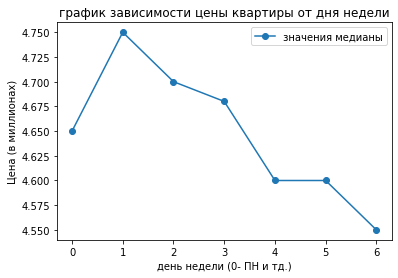

In [151]:
table = (data.pivot_table(index = 'day_of_the_week_exposition',
                          values = 'last_price_million_normal',
                          aggfunc = 'median')
         .plot(style = 'o-', 
               title = 'график зависимости цены квартиры от дня недели',
              ).legend(['значения медианы'])
        )

plt.xlabel('день недели (0- ПН и тд.)')
plt.ylabel('Цена (в миллионах)');

n =  data['last_price_million_normal'].corr(data['day_of_the_week_exposition'])
f'Зависимость между показателями составляет {n:.2%}'


На графике видна  небольшая обратная зависимость - в субботу и воскресенье (5 и 6 день недели) медиана цен квартир чуть дешевле, чем в остальные дни. Такие квартиры, скорее всего, выставляются напрямую собственником без участия риелторов (так как те чаще всего работают по будням) и в стоимость не закладываются доп расходы. Но процент этой зависимости настолько малый(меньше процента), что мы не можем утверждать, что она вообще есть. 

'Зависимость между показателями составляет 0.65%'

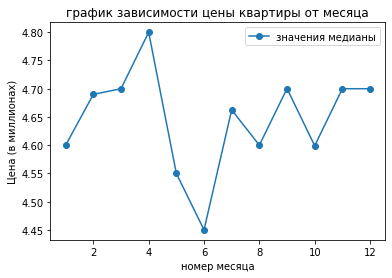

In [152]:
table = (data.pivot_table(index = 'month_exposition',
                          values = 'last_price_million_normal',
                          aggfunc = 'median')
         .plot(style = 'o-', 
               title = 'график зависимости цены квартиры от месяца',
              ).legend(['значения медианы'])
        )

plt.xlabel('номер месяца')
plt.ylabel('Цена (в миллионах)');

n =  data['last_price_million_normal'].corr(data['month_exposition'])
f'Зависимость между показателями составляет {n:.2%}'


По графику мы снова видим, что медиана резко опускается в мае- июне, а после держится более-менее стабильно. Однако, показатель зависимости вновь считает меньше одного процента. Скорее всего, такой спад медиан на графике происходит в следствии уменьшения кол-ва обьявлений в эти месяцы(мы рассматривали  выше).Это же и обьясняет рост с февраля по апрель - исходя из наших данных, это одни из самых популярных месяцев для опубликования объявления

'Зависимость между показателями составляет -5.18%'

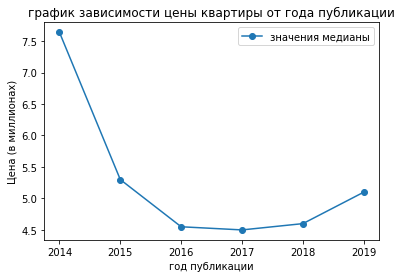

In [153]:
table = (data.pivot_table(index = 'year_exposition',
                          values = 'last_price_million_normal',
                          aggfunc = 'median')
         .plot(style = 'o-', 
               title = 'график зависимости цены квартиры от года публикации',
              ).legend(['значения медианы'])
        )

plt.xlabel('год публикации')
plt.ylabel('Цена (в миллионах)');

n =  data['last_price_million_normal'].corr(data['year_exposition'])
f'Зависимость между показателями составляет {n:.2%}'

На графике видно, что медиана сильно упала в промежутке между 2014 и 2018 годом. Такие скачки цен могут быть из-за внешних условий (ситуация в регионе, стране). Если цена упала - возможно, был скачок по кол-ву обьявлений, что привело к снижению цен. Проверим это графиком ниже:

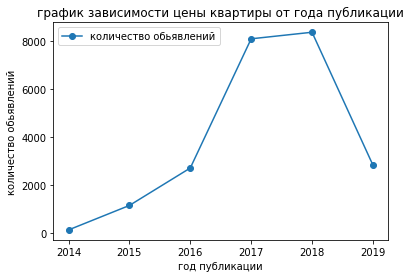

In [154]:
table = (data.pivot_table(index = 'year_exposition',
                          values = 'last_price_million_normal',
                          aggfunc = ['count'])
         .plot(style = 'o-', 
               title = 'график зависимости цены квартиры от года публикации',
              ).legend(['количество обьявлений'])
        )

plt.xlabel('год публикации')
plt.ylabel('количество обьявлений');

Мы видим ровно обратную картину. Число обьявлений увеличивалость  и достигало своих пиковых значений в 2017-2018 годах - в этот же промежуток минимальные значения медианы.
Можем сделать вывод, что год косвенно влияет на цену. То есть, необходимо отслеживать ситуацию на рынке в текущем году, для установки актуальной цены для объекта

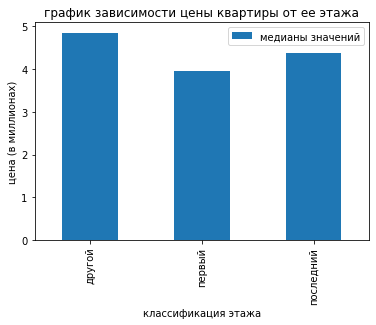

In [155]:
table = (data.pivot_table(index = 'floors_sorted',
                          values = 'last_price_million_normal',
                          aggfunc = ['median'])
         .plot(kind = 'bar', 
               title = 'график зависимости цены квартиры от ее этажа',
              ).legend(['медианы значений'])
        )

plt.xlabel('классификация этажа')
plt.ylabel('цена (в миллионах)');

Медиана первого этажа чуть меньше всех остальных. Если мы обратимся к графику, который мы делали выше о распределении количества обьявлений по данным категориям, то оно будет точно таким же . Самое популярное(высокое) - "другой", а самое низкое (с небольшим отрывом) - "первый". Можно сделать вывод, что падение медианы цены связано с меньшим кол-вом обьявлений подобных квартир.

Изучив корреляции между данными, можно сделать вывод, что факторы, которые больше всего влияют на стоимость квартиры, это:
 - площадь помещения (74%)
 - жилая площадь помещения (62%) 
 - площадь кухни (54%)
 
факторы, которые не влияют на стоимость: 
 - дата публикации (менее 1%)
 - месяц публикации (менее 1%)
 - классификация этажа 
 
Факторы, которые незначительно влияют на стоимость:
 - количество комнат (46%)
 - год публикации (5%)
 

Теперь выполним задание "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра."\
Для начала, нужно найти эти 10 населенных пунктов:

In [156]:
top_10 = list(data['locality_name'].value_counts().head(10).index)  
top_10

['Санкт-Петербург',
 'посёлок Мурино',
 'посёлок Шушары',
 'Всеволожск',
 'Пушкин',
 'Колпино',
 'посёлок Парголово',
 'Гатчина',
 'деревня Кудрово',
 'Выборг']

Далее: создаем срез, где будут только обьявления с самыми популярными населенными пунктами

In [157]:
locality_10 = data.query( "locality_name in @top_10")
locality_10

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area_normal,floor_normal,floors_total_normal,price_one_area,day_of_the_week_exposition,month_exposition,year_exposition,floors_sorted,city_centers_nearest_km,days_exposition_not_hull
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,25.00,8.0,16,0.12,3,3,2019,другой,16.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,False,...,11.00,1.0,11,0.08,1,12,2018,первый,19.0,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,False,...,8.30,4.0,5,0.09,3,8,2015,другой,14.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,NaN,9,False,...,NaN,9.0,14,0.41,4,7,2015,другой,7.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,NaN,13.0,14,0.10,1,6,2018,другой,8.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000.0,35.30,2018-02-28,1,2.86,15,16.3,4,False,...,9.10,4.0,15,0.10,2,2,2018,другой,16.0,29.0
23690,3,5500000.0,52.00,2018-07-19,2,2.65,5,31.0,2,False,...,6.00,2.0,5,0.11,3,7,2018,другой,6.0,15.0
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25,40.3,7,False,...,10.60,7.0,25,0.13,3,10,2016,другой,4.0,519.0
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,13.83,3.0,5,0.07,1,3,2017,другой,4.0,NaN


создаем столб, где посчитана цена за 1 кв. м в каждом обьявлении

In [158]:
locality_10['prise_1m'] = locality_10['last_price'] / locality_10['total_area_normal']

Создаем график, где будут отражена медиана цен по каждому городу:

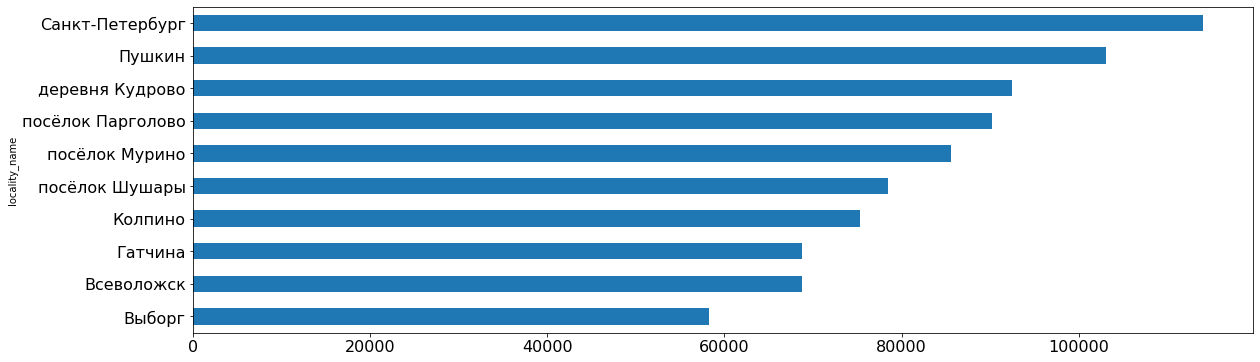

In [159]:
locality_10_mean = (locality_10.pivot_table(index = 'locality_name', values = 'prise_1m', aggfunc = 'mean'  )
                   .sort_values( by ='prise_1m')
                   .plot(kind = 'barh', figsize = (19,6), legend = False, fontsize = 16))

Вывод:\
Самая высокая цена квадратного метра из 10 самых частовстречаемых населенных пунтках по продаже недвижимости - в Санкт-Петербурге (более 100 000р)\
Самая низкая - в Выборге (менее 60 000р)

Выполним задание : "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города"\

Для выполнения задания необходимо составить срез данных только по Санкт-Петербургу. Сделаем это при помощи loc:


In [160]:
data_SPB = data.loc[data['locality_name'] == 'Санкт-Петербург'] 
data_SPB.shape # проверяем, что все данные в строках и столбцах точно вошли в новый df

(15641, 39)

In [161]:
data_SPB['city_centers_nearest_km'] = (data_SPB['city_centers_nearest_km']
                                       .fillna(data_SPB['city_centers_nearest_km'].median())
                                       .astype('int')
                                      )
data_SPB.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area_normal,floor_normal,floors_total_normal,price_one_area,day_of_the_week_exposition,month_exposition,year_exposition,floors_sorted,city_centers_nearest_km,days_exposition_not_hull
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,25.0,8.0,16,0.12,3,3,2019,другой,16,NaN
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,8.3,4.0,5,0.09,3,8,2015,другой,14,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,NaN,9.0,14,0.41,4,7,2015,другой,7,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,NaN,13.0,14,0.10,1,6,2018,другой,8,121.0
7,5,7915000.0,71.6,2019-04-18,2,2.65,24,NaN,22,False,...,18.9,22.0,24,0.11,3,4,2019,другой,12,NaN


Построим сводную таблицу, где расчитано среднее значение цены по удаленности от центра. В таблице указана разница между предыдущим значением (то есть, фактическая цена 1 км) 

In [162]:
# data_SPB['differense'] = data_SPB['city_centers_nearest_km'].diff()
data_SPB_table = data_SPB.pivot_table(index = 'city_centers_nearest_km', values = 'last_price_million_normal')
data_SPB_table.diff()

,last_price_million_normal
city_centers_nearest_km,
0,NaN
1,-10.249398
2,-1.278357
3,-3.878163
4,0.286243
5,1.347186
6,1.029282
7,0.166523
8,-4.723867


<AxesSubplot:xlabel='city_centers_nearest_km'>

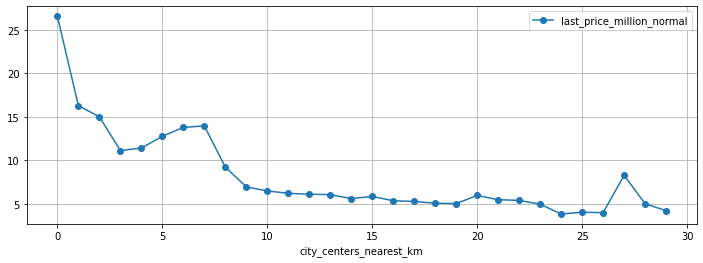

In [163]:
data_SPB_table.plot( style = 'o-', grid =True ,figsize = (12, 4) ) #построим график для лучшей оценки данных

Как мы видим, цена резко падает при удаленности от центра в 1 километр и постепенно поднимается с 3 по 7 километры. Так же, можно заметить скачок в 27 километре. Необходимо рассмотреть эти отрезки (3 по 7 км и 27 км), чтобы обьяснить нетипичный рост графика


Для начала, рассмотрим рост, который привел к повышению цен в 27 километре:

In [164]:
data_SPB.loc[(data_SPB['city_centers_nearest_km'] == 27) ]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area_normal,floor_normal,floors_total_normal,price_one_area,day_of_the_week_exposition,month_exposition,year_exposition,floors_sorted,city_centers_nearest_km,days_exposition_not_hull
748,13,14350000.0,74.0,2017-11-28,2,3.13,5,30.0,3,False,...,25.0,3.0,5,0.19,1,11,2017,другой,27,128.0
5961,6,2250000.0,32.0,2018-02-27,1,2.65,2,16.5,2,False,...,7.0,2.0,2,0.07,1,2,2018,последний,27,178.0


Здесь всего 2 квартиры, с ценами 14.3 и 2.25 миллионов. Скачок в графике произошел из-за высокой разницы цены квартир

Теперь разберемся отдельно с каждым киллометром до 7 (включительно), чтобы зафиксировать причину роста графика в промежутке 3-7

In [165]:
data_SPB_outlier1 = data_SPB.loc[(data_SPB['city_centers_nearest_km'] <= 7) ]

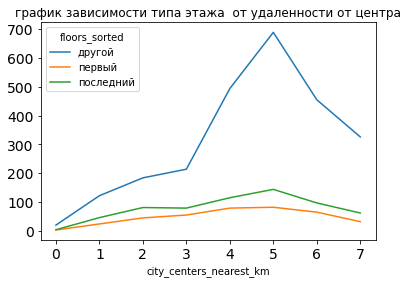

In [166]:
data_SPB_outlier1_t = (data_SPB_outlier1.pivot_table(index = 'city_centers_nearest_km',
                                                    columns = 'floors_sorted',
                                                    values = 'last_price',
                                                    aggfunc = 'count')
                       .plot(legend = True, fontsize = 14)
                      );
      
plt.title( 'график зависимости типа этажа  от удаленности от центра');

с 3 километра количество квартир на "другом" сильно возврастает - по всей видимости появляются новостройки с бОльшим кол-вом этажей

В предобработке мы заменили тип данных в 'floors_total' на Int64, для вычисление медианы, нам необходимо еще изменить на int64

In [167]:
data_SPB_outlier1['floors_total'] = data_SPB_outlier1['floors_total'].astype('int64')

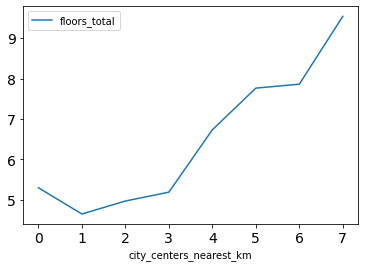

In [168]:
data_SPB_outlier1_tt = (data_SPB_outlier1.pivot_table(index = 'city_centers_nearest_km',                    
                                                     values = 'floors_total',
                                                     aggfunc = 'mean')
                       .plot(legend = True, fontsize = 14)
                            
                      )

Среднее кол-во этажей начинает восрастать с 3-го километра, значит, скачок произошел именно по этой причине:\
Возрасла плотность заселения: чем выше этажей в доме - тем больше квартир. Соотвественно, большее количество обьявлений в этом промежутке и дает увеличение медианы.

Вывод:
 - От 0 до 2х километров от центра цена каждого километра высока, но резко падает в каждом следующем значении
 - В промежутке от 3 до 7 километра падение сменяется небольшим ростом - появляются многоэтажки, количество квартир растет вместе их медианной стоимостью
 - После 7 километра цена стабильно постепенно снижается при бОльшем удалении от центра

### Общий вывод

В ходе работы были установлены основные параметры которые влияют на ценообразовыание квартиры, а именно:
- ключевую роль в оценке недвижимости играет ее квадратура. Причем, общее количество квадратных метров будет влиять на цену выше, чем количество комнат в ней (проценты кореляции 65% и 37% соотвественно)
- Самая дорогая цена за 1 квадратный метр у Санкт-Петербурга (более 100 000). Этот же город  является самым популярным по обьявлениям. Так же, можно отметить, что внутри города цена сильно меняется при удалении от центра.Сильно падает с каждым километром в самом центре (0-3 км) и незначительно повышается с 4 по 7 километр
- Самый дешевый квадратный метр из популярных населенных пунктов - в Выборге (менее 60 000р)
- Количество обьявлений на продажу квартиры варьируются в зависимости от сезона (рост числа происходит весной и осенью) - в это время лучше всего стоит рассматривать покупку недвижимости, так как увеличивается конкуренция, и вероятность найти более выгодное по условиям и цене предложение  возрастает 
- Дата публикации обьявления мало влияет на ее цену. Однако, внешние события могут влиять на популярность в продаже\приобретении недвижимости, поэтому нужно отслеживать как за последние пару лет менялись кол-во и средняя цена объектов, для более подходящей оценки недвижимости по рынку.
- быстрыми продажами можно назвать те, что состоялись в течении 2х месяцев, а долгими - 8 месяцев и выше 
